# MLP Heart Disease Predictor

Importing Initial Libraries

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf

Read and Define Features

In [24]:
df = pd.read_csv('CVD_cleaned.csv')

In [25]:
numeric_features = ['Height_(cm)',
                   'Weight_(kg)',
                   'BMI',
                   'Alcohol_Consumption',
                   'Fruit_Consumption',
                   'Green_Vegetables_Consumption',
                   'FriedPotato_Consumption']

categorical_features = ['General_Health',
                       'Checkup','Exercise','Skin_Cancer','Other_Cancer',
                        'Depression','Diabetes','Arthritis',
                       'Sex',
                       'Age_Category',
                       'Smoking_History']

target = 'Heart_Disease'

Data Preprocessing (one-hot encoding for categorical feautres and normalization for numeric feature)

In [26]:
df = pd.get_dummies(df, columns=categorical_features)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [29]:
df['Heart_Disease'] = df['Heart_Disease'].replace({'Yes': 1, 'No': 0})

Balancing dataset between positive and negative heart disease cases

In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [31]:
X = X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']


In [32]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X, y)

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_resampled_over, y_resampled_over)

In [33]:
df_balanced = pd.concat([X_resampled_under, y_resampled_under], axis=1)

In [34]:
X_balanced = df_balanced.drop(columns=['Heart_Disease'])
y_balanced = df_balanced['Heart_Disease']

Split to train and test set

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

Define checkpoints

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = r'\Users\kelzo\Desktop\checkpoints'
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)
    
    

Define model, train, and output test accuracy.

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score





model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=1000, callbacks=[checkpoint], batch_size=32, validation_split=0.1, verbose=1)


y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy)

Epoch 1/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.7623
Epoch 1: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.4968 - accuracy: 0.7623 - val_loss: 0.4888 - val_accuracy: 0.7690
Epoch 2/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.4884 - accuracy: 0.7667
Epoch 2: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4884 - accuracy: 0.7667 - val_loss: 0.4827 - val_accuracy: 0.7676
Epoch 3/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.7717
Epoch 3: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4799 - accuracy: 0.7717 - val_loss: 0.4743 - val_accuracy: 0.7740
Epoch 4/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.4695 - accuracy: 0.7775
Epoch 4: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4696 - accuracy: 0.7775 - val_loss: 0.4710 - val_accuracy: 0.7792
Epoch 5/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.4592 - accuracy: 0.7832
Epoch 5: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4592 - accuracy: 0.7832 - val_loss: 0.4587 - val_accuracy: 0.7860
Epoch 6/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.7884
Epoch 6: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4492 - accuracy: 0.7884 - val_loss: 0.4511 - val_accuracy: 0.7895
Epoch 7/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.4399 - accuracy: 0.7936
Epoch 7: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4399 - accuracy: 0.7936 - val_loss: 0.4438 - val_accuracy: 0.7944
Epoch 8/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.4310 - accuracy: 0.7986
Epoch 8: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4309 - accuracy: 0.7986 - val_loss: 0.4387 - val_accuracy: 0.7945
Epoch 9/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.4225 - accuracy: 0.8035
Epoch 9: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4225 - accuracy: 0.8035 - val_loss: 0.4260 - val_accuracy: 0.8036
Epoch 10/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.4142 - accuracy: 0.8077
Epoch 10: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4143 - accuracy: 0.8077 - val_loss: 0.4215 - val_accuracy: 0.8055
Epoch 11/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.4072 - accuracy: 0.8122
Epoch 11: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4072 - accuracy: 0.8122 - val_loss: 0.4163 - val_accuracy: 0.8090
Epoch 12/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8161
Epoch 12: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.4001 - accuracy: 0.8161 - val_loss: 0.4136 - val_accuracy: 0.8082
Epoch 13/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.3927 - accuracy: 0.8208
Epoch 13: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3927 - accuracy: 0.8208 - val_loss: 0.4083 - val_accuracy: 0.8158
Epoch 14/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.8247
Epoch 14: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3859 - accuracy: 0.8247 - val_loss: 0.4024 - val_accuracy: 0.8188
Epoch 15/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.3799 - accuracy: 0.8284
Epoch 15: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3799 - accuracy: 0.8283 - val_loss: 0.3969 - val_accuracy: 0.8223
Epoch 16/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.3737 - accuracy: 0.8318
Epoch 16: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3737 - accuracy: 0.8318 - val_loss: 0.3936 - val_accuracy: 0.8226
Epoch 17/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8354
Epoch 17: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3681 - accuracy: 0.8353 - val_loss: 0.3907 - val_accuracy: 0.8233
Epoch 18/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8388
Epoch 18: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3626 - accuracy: 0.8388 - val_loss: 0.3810 - val_accuracy: 0.8300
Epoch 19/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8412
Epoch 19: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3580 - accuracy: 0.8411 - val_loss: 0.3814 - val_accuracy: 0.8273
Epoch 20/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.3525 - accuracy: 0.8438
Epoch 20: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3525 - accuracy: 0.8438 - val_loss: 0.3820 - val_accuracy: 0.8298
Epoch 21/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.8473
Epoch 21: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3475 - accuracy: 0.8473 - val_loss: 0.3736 - val_accuracy: 0.8353
Epoch 22/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.3433 - accuracy: 0.8498
Epoch 22: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3433 - accuracy: 0.8498 - val_loss: 0.3745 - val_accuracy: 0.8365
Epoch 23/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.3384 - accuracy: 0.8524
Epoch 23: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3385 - accuracy: 0.8524 - val_loss: 0.3713 - val_accuracy: 0.8391
Epoch 24/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.3341 - accuracy: 0.8543
Epoch 24: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3342 - accuracy: 0.8542 - val_loss: 0.3663 - val_accuracy: 0.8408
Epoch 25/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.3305 - accuracy: 0.8570
Epoch 25: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3305 - accuracy: 0.8570 - val_loss: 0.3645 - val_accuracy: 0.8407
Epoch 26/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8588
Epoch 26: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3264 - accuracy: 0.8588 - val_loss: 0.3605 - val_accuracy: 0.8469
Epoch 27/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.3224 - accuracy: 0.8613
Epoch 27: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3225 - accuracy: 0.8612 - val_loss: 0.3559 - val_accuracy: 0.8490
Epoch 28/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8631
Epoch 28: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3188 - accuracy: 0.8632 - val_loss: 0.3550 - val_accuracy: 0.8482
Epoch 29/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.3150 - accuracy: 0.8654
Epoch 29: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3150 - accuracy: 0.8654 - val_loss: 0.3507 - val_accuracy: 0.8518
Epoch 30/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.3117 - accuracy: 0.8673
Epoch 30: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3117 - accuracy: 0.8673 - val_loss: 0.3507 - val_accuracy: 0.8500
Epoch 31/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.3092 - accuracy: 0.8686
Epoch 31: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3092 - accuracy: 0.8686 - val_loss: 0.3510 - val_accuracy: 0.8502
Epoch 32/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.3063 - accuracy: 0.8701
Epoch 32: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3063 - accuracy: 0.8701 - val_loss: 0.3488 - val_accuracy: 0.8553
Epoch 33/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.3029 - accuracy: 0.8718
Epoch 33: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.3029 - accuracy: 0.8718 - val_loss: 0.3463 - val_accuracy: 0.8547
Epoch 34/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.8737
Epoch 34: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2996 - accuracy: 0.8737 - val_loss: 0.3494 - val_accuracy: 0.8537
Epoch 35/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.2969 - accuracy: 0.8754
Epoch 35: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2969 - accuracy: 0.8754 - val_loss: 0.3420 - val_accuracy: 0.8574
Epoch 36/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8769
Epoch 36: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2945 - accuracy: 0.8769 - val_loss: 0.3423 - val_accuracy: 0.8621
Epoch 37/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8786
Epoch 37: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2910 - accuracy: 0.8786 - val_loss: 0.3383 - val_accuracy: 0.8624
Epoch 38/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.2885 - accuracy: 0.8800
Epoch 38: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2885 - accuracy: 0.8800 - val_loss: 0.3382 - val_accuracy: 0.8611
Epoch 39/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.2867 - accuracy: 0.8807
Epoch 39: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2867 - accuracy: 0.8807 - val_loss: 0.3395 - val_accuracy: 0.8625
Epoch 40/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.8825
Epoch 40: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2842 - accuracy: 0.8825 - val_loss: 0.3354 - val_accuracy: 0.8630
Epoch 41/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8839
Epoch 41: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2817 - accuracy: 0.8839 - val_loss: 0.3352 - val_accuracy: 0.8642
Epoch 42/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8849
Epoch 42: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2790 - accuracy: 0.8848 - val_loss: 0.3294 - val_accuracy: 0.8660
Epoch 43/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8857
Epoch 43: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2777 - accuracy: 0.8857 - val_loss: 0.3361 - val_accuracy: 0.8665
Epoch 44/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.2744 - accuracy: 0.8875
Epoch 44: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2744 - accuracy: 0.8875 - val_loss: 0.3318 - val_accuracy: 0.8634
Epoch 45/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.2725 - accuracy: 0.8884
Epoch 45: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2725 - accuracy: 0.8884 - val_loss: 0.3269 - val_accuracy: 0.8696
Epoch 46/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.2713 - accuracy: 0.8896
Epoch 46: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2714 - accuracy: 0.8896 - val_loss: 0.3245 - val_accuracy: 0.8685
Epoch 47/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.8900
Epoch 47: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2694 - accuracy: 0.8900 - val_loss: 0.3328 - val_accuracy: 0.8671
Epoch 48/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.8912
Epoch 48: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2674 - accuracy: 0.8912 - val_loss: 0.3190 - val_accuracy: 0.8722
Epoch 49/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.8918
Epoch 49: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2660 - accuracy: 0.8918 - val_loss: 0.3177 - val_accuracy: 0.8735
Epoch 50/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.8931
Epoch 50: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2637 - accuracy: 0.8931 - val_loss: 0.3272 - val_accuracy: 0.8738
Epoch 51/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.8936
Epoch 51: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2621 - accuracy: 0.8936 - val_loss: 0.3215 - val_accuracy: 0.8748
Epoch 52/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.8948
Epoch 52: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2598 - accuracy: 0.8948 - val_loss: 0.3149 - val_accuracy: 0.8746
Epoch 53/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.8955
Epoch 53: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2587 - accuracy: 0.8955 - val_loss: 0.3230 - val_accuracy: 0.8754
Epoch 54/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.8965
Epoch 54: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2574 - accuracy: 0.8964 - val_loss: 0.3251 - val_accuracy: 0.8774
Epoch 55/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.2551 - accuracy: 0.8974
Epoch 55: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2551 - accuracy: 0.8974 - val_loss: 0.3304 - val_accuracy: 0.8734
Epoch 56/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.8982
Epoch 56: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2540 - accuracy: 0.8982 - val_loss: 0.3215 - val_accuracy: 0.8764
Epoch 57/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.8992
Epoch 57: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2523 - accuracy: 0.8993 - val_loss: 0.3168 - val_accuracy: 0.8786
Epoch 58/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8997
Epoch 58: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2508 - accuracy: 0.8997 - val_loss: 0.3193 - val_accuracy: 0.8765
Epoch 59/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.2497 - accuracy: 0.9001
Epoch 59: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2497 - accuracy: 0.9001 - val_loss: 0.3177 - val_accuracy: 0.8802
Epoch 60/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.2479 - accuracy: 0.9008
Epoch 60: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2479 - accuracy: 0.9008 - val_loss: 0.3189 - val_accuracy: 0.8799
Epoch 61/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.2466 - accuracy: 0.9018
Epoch 61: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2466 - accuracy: 0.9018 - val_loss: 0.3155 - val_accuracy: 0.8803
Epoch 62/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9024
Epoch 62: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2453 - accuracy: 0.9024 - val_loss: 0.3150 - val_accuracy: 0.8826
Epoch 63/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.9036
Epoch 63: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2429 - accuracy: 0.9036 - val_loss: 0.3184 - val_accuracy: 0.8791
Epoch 64/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.2421 - accuracy: 0.9043
Epoch 64: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2421 - accuracy: 0.9043 - val_loss: 0.3171 - val_accuracy: 0.8823
Epoch 65/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9045
Epoch 65: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2416 - accuracy: 0.9045 - val_loss: 0.3229 - val_accuracy: 0.8812
Epoch 66/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9046
Epoch 66: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2409 - accuracy: 0.9046 - val_loss: 0.3077 - val_accuracy: 0.8851
Epoch 67/1000
12727/12775 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9054
Epoch 67: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2389 - accuracy: 0.9054 - val_loss: 0.3152 - val_accuracy: 0.8835
Epoch 68/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.9063
Epoch 68: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2377 - accuracy: 0.9063 - val_loss: 0.3110 - val_accuracy: 0.8830
Epoch 69/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9067
Epoch 69: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2365 - accuracy: 0.9067 - val_loss: 0.3178 - val_accuracy: 0.8833
Epoch 70/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.2358 - accuracy: 0.9072
Epoch 70: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2357 - accuracy: 0.9072 - val_loss: 0.3208 - val_accuracy: 0.8823
Epoch 71/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.9074
Epoch 71: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2348 - accuracy: 0.9074 - val_loss: 0.3318 - val_accuracy: 0.8816
Epoch 72/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9078
Epoch 72: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2339 - accuracy: 0.9078 - val_loss: 0.2997 - val_accuracy: 0.8861
Epoch 73/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.2331 - accuracy: 0.9082
Epoch 73: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2331 - accuracy: 0.9082 - val_loss: 0.3152 - val_accuracy: 0.8847
Epoch 74/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.2310 - accuracy: 0.9094
Epoch 74: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2310 - accuracy: 0.9093 - val_loss: 0.3075 - val_accuracy: 0.8857
Epoch 75/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9096
Epoch 75: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2308 - accuracy: 0.9096 - val_loss: 0.3175 - val_accuracy: 0.8863
Epoch 76/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9097
Epoch 76: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2302 - accuracy: 0.9097 - val_loss: 0.3133 - val_accuracy: 0.8857
Epoch 77/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.9109
Epoch 77: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2283 - accuracy: 0.9109 - val_loss: 0.3025 - val_accuracy: 0.8889
Epoch 78/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9114
Epoch 78: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2264 - accuracy: 0.9114 - val_loss: 0.3070 - val_accuracy: 0.8881
Epoch 79/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9116
Epoch 79: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2264 - accuracy: 0.9116 - val_loss: 0.3204 - val_accuracy: 0.8877
Epoch 80/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9121
Epoch 80: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2256 - accuracy: 0.9121 - val_loss: 0.3085 - val_accuracy: 0.8886
Epoch 81/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9127
Epoch 81: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2244 - accuracy: 0.9127 - val_loss: 0.3024 - val_accuracy: 0.8888
Epoch 82/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9134
Epoch 82: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2227 - accuracy: 0.9134 - val_loss: 0.2986 - val_accuracy: 0.8904
Epoch 83/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.9138
Epoch 83: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2225 - accuracy: 0.9138 - val_loss: 0.3140 - val_accuracy: 0.8888
Epoch 84/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9138
Epoch 84: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2216 - accuracy: 0.9138 - val_loss: 0.3012 - val_accuracy: 0.8916
Epoch 85/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.9147
Epoch 85: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2202 - accuracy: 0.9147 - val_loss: 0.3085 - val_accuracy: 0.8888
Epoch 86/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9146
Epoch 86: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2204 - accuracy: 0.9146 - val_loss: 0.3045 - val_accuracy: 0.8916
Epoch 87/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9154
Epoch 87: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2189 - accuracy: 0.9154 - val_loss: 0.3116 - val_accuracy: 0.8879
Epoch 88/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9159
Epoch 88: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2182 - accuracy: 0.9159 - val_loss: 0.3108 - val_accuracy: 0.8885
Epoch 89/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9161
Epoch 89: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2173 - accuracy: 0.9161 - val_loss: 0.3077 - val_accuracy: 0.8891
Epoch 90/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9163
Epoch 90: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2173 - accuracy: 0.9163 - val_loss: 0.3103 - val_accuracy: 0.8906
Epoch 91/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9167
Epoch 91: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2159 - accuracy: 0.9167 - val_loss: 0.3136 - val_accuracy: 0.8915
Epoch 92/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9170
Epoch 92: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2161 - accuracy: 0.9169 - val_loss: 0.2969 - val_accuracy: 0.8930
Epoch 93/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9176
Epoch 93: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2147 - accuracy: 0.9176 - val_loss: 0.3142 - val_accuracy: 0.8929
Epoch 94/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9171
Epoch 94: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2149 - accuracy: 0.9171 - val_loss: 0.3257 - val_accuracy: 0.8882
Epoch 95/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9177
Epoch 95: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2138 - accuracy: 0.9176 - val_loss: 0.3095 - val_accuracy: 0.8919
Epoch 96/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9182
Epoch 96: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2134 - accuracy: 0.9182 - val_loss: 0.3074 - val_accuracy: 0.8919
Epoch 97/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9183
Epoch 97: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2121 - accuracy: 0.9183 - val_loss: 0.3010 - val_accuracy: 0.8950
Epoch 98/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9183
Epoch 98: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2128 - accuracy: 0.9183 - val_loss: 0.3166 - val_accuracy: 0.8911
Epoch 99/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9188
Epoch 99: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2119 - accuracy: 0.9188 - val_loss: 0.3094 - val_accuracy: 0.8952
Epoch 100/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9195
Epoch 100: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2105 - accuracy: 0.9194 - val_loss: 0.3018 - val_accuracy: 0.8923
Epoch 101/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9199
Epoch 101: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2099 - accuracy: 0.9198 - val_loss: 0.3071 - val_accuracy: 0.8931
Epoch 102/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9197
Epoch 102: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2094 - accuracy: 0.9197 - val_loss: 0.3055 - val_accuracy: 0.8945
Epoch 103/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.2088 - accuracy: 0.9200
Epoch 103: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2088 - accuracy: 0.9199 - val_loss: 0.2872 - val_accuracy: 0.8979
Epoch 104/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9206
Epoch 104: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.2079 - accuracy: 0.9206 - val_loss: 0.3058 - val_accuracy: 0.8926
Epoch 105/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9210
Epoch 105: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2072 - accuracy: 0.9210 - val_loss: 0.3051 - val_accuracy: 0.8955
Epoch 106/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.9215
Epoch 106: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2064 - accuracy: 0.9214 - val_loss: 0.2976 - val_accuracy: 0.8952
Epoch 107/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.2051 - accuracy: 0.9219
Epoch 107: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2051 - accuracy: 0.9219 - val_loss: 0.3073 - val_accuracy: 0.8933
Epoch 108/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.9218
Epoch 108: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2056 - accuracy: 0.9218 - val_loss: 0.2962 - val_accuracy: 0.8954
Epoch 109/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9225
Epoch 109: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2044 - accuracy: 0.9225 - val_loss: 0.2987 - val_accuracy: 0.8962
Epoch 110/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9228
Epoch 110: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2041 - accuracy: 0.9227 - val_loss: 0.2976 - val_accuracy: 0.8966
Epoch 111/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.2033 - accuracy: 0.9228
Epoch 111: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2033 - accuracy: 0.9228 - val_loss: 0.3076 - val_accuracy: 0.8942
Epoch 112/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.9227
Epoch 112: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.2036 - accuracy: 0.9227 - val_loss: 0.3207 - val_accuracy: 0.8965
Epoch 113/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9235
Epoch 113: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2015 - accuracy: 0.9234 - val_loss: 0.3010 - val_accuracy: 0.8978
Epoch 114/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9232
Epoch 114: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.2025 - accuracy: 0.9232 - val_loss: 0.3117 - val_accuracy: 0.8957
Epoch 115/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9236
Epoch 115: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2019 - accuracy: 0.9236 - val_loss: 0.3078 - val_accuracy: 0.8971
Epoch 116/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9238
Epoch 116: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2009 - accuracy: 0.9239 - val_loss: 0.3102 - val_accuracy: 0.9001
Epoch 117/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9245
Epoch 117: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2001 - accuracy: 0.9245 - val_loss: 0.3060 - val_accuracy: 0.8972
Epoch 118/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9240
Epoch 118: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.2000 - accuracy: 0.9240 - val_loss: 0.3093 - val_accuracy: 0.8960
Epoch 119/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9246
Epoch 119: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1993 - accuracy: 0.9246 - val_loss: 0.3034 - val_accuracy: 0.8966
Epoch 120/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9246
Epoch 120: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1991 - accuracy: 0.9246 - val_loss: 0.3114 - val_accuracy: 0.8963
Epoch 121/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9247
Epoch 121: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1993 - accuracy: 0.9247 - val_loss: 0.3199 - val_accuracy: 0.8981
Epoch 122/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9252
Epoch 122: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1985 - accuracy: 0.9251 - val_loss: 0.3152 - val_accuracy: 0.8951
Epoch 123/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9256
Epoch 123: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1973 - accuracy: 0.9256 - val_loss: 0.3227 - val_accuracy: 0.8970
Epoch 124/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9258
Epoch 124: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1980 - accuracy: 0.9257 - val_loss: 0.3094 - val_accuracy: 0.8971
Epoch 125/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1977 - accuracy: 0.9251
Epoch 125: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1977 - accuracy: 0.9251 - val_loss: 0.3004 - val_accuracy: 0.8989
Epoch 126/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1960 - accuracy: 0.9263
Epoch 126: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1961 - accuracy: 0.9262 - val_loss: 0.2940 - val_accuracy: 0.8999
Epoch 127/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9264
Epoch 127: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1957 - accuracy: 0.9264 - val_loss: 0.3068 - val_accuracy: 0.9013
Epoch 128/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1951 - accuracy: 0.9265
Epoch 128: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1951 - accuracy: 0.9265 - val_loss: 0.2972 - val_accuracy: 0.9020
Epoch 129/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9268
Epoch 129: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1942 - accuracy: 0.9268 - val_loss: 0.3137 - val_accuracy: 0.8992
Epoch 130/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1947 - accuracy: 0.9265
Epoch 130: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1947 - accuracy: 0.9265 - val_loss: 0.3120 - val_accuracy: 0.8968
Epoch 131/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9271
Epoch 131: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1936 - accuracy: 0.9271 - val_loss: 0.3082 - val_accuracy: 0.9002
Epoch 132/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1938 - accuracy: 0.9272
Epoch 132: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1938 - accuracy: 0.9272 - val_loss: 0.3060 - val_accuracy: 0.8995
Epoch 133/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9276
Epoch 133: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1930 - accuracy: 0.9276 - val_loss: 0.3103 - val_accuracy: 0.9003
Epoch 134/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1938 - accuracy: 0.9270
Epoch 134: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1938 - accuracy: 0.9270 - val_loss: 0.2871 - val_accuracy: 0.8996
Epoch 135/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9275
Epoch 135: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1928 - accuracy: 0.9275 - val_loss: 0.3231 - val_accuracy: 0.9019
Epoch 136/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.9283
Epoch 136: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1915 - accuracy: 0.9283 - val_loss: 0.3006 - val_accuracy: 0.9023
Epoch 137/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9283
Epoch 137: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1908 - accuracy: 0.9282 - val_loss: 0.3088 - val_accuracy: 0.8979
Epoch 138/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9284
Epoch 138: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1911 - accuracy: 0.9285 - val_loss: 0.3004 - val_accuracy: 0.9014
Epoch 139/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9291
Epoch 139: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1896 - accuracy: 0.9291 - val_loss: 0.3097 - val_accuracy: 0.9022
Epoch 140/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9296
Epoch 140: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1893 - accuracy: 0.9296 - val_loss: 0.3083 - val_accuracy: 0.9014
Epoch 141/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9288
Epoch 141: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1893 - accuracy: 0.9288 - val_loss: 0.3095 - val_accuracy: 0.9009
Epoch 142/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1892 - accuracy: 0.9293
Epoch 142: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1892 - accuracy: 0.9293 - val_loss: 0.3298 - val_accuracy: 0.9012
Epoch 143/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9295
Epoch 143: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1885 - accuracy: 0.9295 - val_loss: 0.3157 - val_accuracy: 0.8990
Epoch 144/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9292
Epoch 144: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1887 - accuracy: 0.9292 - val_loss: 0.3114 - val_accuracy: 0.9001
Epoch 145/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9296
Epoch 145: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1883 - accuracy: 0.9296 - val_loss: 0.3120 - val_accuracy: 0.9020
Epoch 146/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1877 - accuracy: 0.9298
Epoch 146: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1877 - accuracy: 0.9299 - val_loss: 0.3167 - val_accuracy: 0.9006
Epoch 147/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9295
Epoch 147: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1880 - accuracy: 0.9295 - val_loss: 0.3037 - val_accuracy: 0.9005
Epoch 148/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1867 - accuracy: 0.9305
Epoch 148: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1867 - accuracy: 0.9305 - val_loss: 0.3178 - val_accuracy: 0.9007
Epoch 149/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1855 - accuracy: 0.9308
Epoch 149: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1856 - accuracy: 0.9308 - val_loss: 0.3101 - val_accuracy: 0.9040
Epoch 150/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1859 - accuracy: 0.9307
Epoch 150: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1859 - accuracy: 0.9307 - val_loss: 0.2992 - val_accuracy: 0.9028
Epoch 151/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9304
Epoch 151: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1864 - accuracy: 0.9304 - val_loss: 0.3021 - val_accuracy: 0.9033
Epoch 152/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9311
Epoch 152: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1852 - accuracy: 0.9311 - val_loss: 0.3388 - val_accuracy: 0.9009
Epoch 153/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9311
Epoch 153: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1853 - accuracy: 0.9311 - val_loss: 0.3094 - val_accuracy: 0.9034
Epoch 154/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.9310
Epoch 154: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1843 - accuracy: 0.9310 - val_loss: 0.3141 - val_accuracy: 0.9023
Epoch 155/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.9317
Epoch 155: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1843 - accuracy: 0.9317 - val_loss: 0.3122 - val_accuracy: 0.9034
Epoch 156/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9315
Epoch 156: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1837 - accuracy: 0.9315 - val_loss: 0.3156 - val_accuracy: 0.9020
Epoch 157/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9315
Epoch 157: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1840 - accuracy: 0.9315 - val_loss: 0.3523 - val_accuracy: 0.9031
Epoch 158/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9322
Epoch 158: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1830 - accuracy: 0.9322 - val_loss: 0.3308 - val_accuracy: 0.8994
Epoch 159/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.9316
Epoch 159: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1835 - accuracy: 0.9316 - val_loss: 0.3095 - val_accuracy: 0.9037
Epoch 160/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1823 - accuracy: 0.9323
Epoch 160: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1824 - accuracy: 0.9323 - val_loss: 0.3246 - val_accuracy: 0.9020
Epoch 161/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9317
Epoch 161: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1839 - accuracy: 0.9317 - val_loss: 0.3237 - val_accuracy: 0.9007
Epoch 162/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9322
Epoch 162: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1825 - accuracy: 0.9322 - val_loss: 0.3129 - val_accuracy: 0.9032
Epoch 163/1000
12725/12775 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9320
Epoch 163: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1822 - accuracy: 0.9320 - val_loss: 0.3303 - val_accuracy: 0.9054
Epoch 164/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9321
Epoch 164: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1825 - accuracy: 0.9321 - val_loss: 0.3128 - val_accuracy: 0.9052
Epoch 165/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1814 - accuracy: 0.9325
Epoch 165: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1814 - accuracy: 0.9326 - val_loss: 0.3264 - val_accuracy: 0.9008
Epoch 166/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1797 - accuracy: 0.9333
Epoch 166: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1797 - accuracy: 0.9333 - val_loss: 0.3279 - val_accuracy: 0.9051
Epoch 167/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1796 - accuracy: 0.9335
Epoch 167: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1796 - accuracy: 0.9335 - val_loss: 0.3226 - val_accuracy: 0.9062
Epoch 168/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1796 - accuracy: 0.9337
Epoch 168: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1796 - accuracy: 0.9337 - val_loss: 0.3117 - val_accuracy: 0.9036
Epoch 169/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9341
Epoch 169: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1794 - accuracy: 0.9341 - val_loss: 0.3047 - val_accuracy: 0.9036
Epoch 170/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.9336
Epoch 170: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1794 - accuracy: 0.9336 - val_loss: 0.3251 - val_accuracy: 0.9020
Epoch 171/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.9339
Epoch 171: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1788 - accuracy: 0.9339 - val_loss: 0.3072 - val_accuracy: 0.9049
Epoch 172/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1783 - accuracy: 0.9342
Epoch 172: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1783 - accuracy: 0.9342 - val_loss: 0.3281 - val_accuracy: 0.9059
Epoch 173/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1778 - accuracy: 0.9342
Epoch 173: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1778 - accuracy: 0.9343 - val_loss: 0.3486 - val_accuracy: 0.9033
Epoch 174/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.9344
Epoch 174: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1775 - accuracy: 0.9344 - val_loss: 0.3217 - val_accuracy: 0.9043
Epoch 175/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1777 - accuracy: 0.9341
Epoch 175: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1777 - accuracy: 0.9341 - val_loss: 0.3252 - val_accuracy: 0.9052
Epoch 176/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.9343
Epoch 176: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1776 - accuracy: 0.9343 - val_loss: 0.3144 - val_accuracy: 0.9047
Epoch 177/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1769 - accuracy: 0.9346
Epoch 177: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1769 - accuracy: 0.9346 - val_loss: 0.3213 - val_accuracy: 0.9058
Epoch 178/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1761 - accuracy: 0.9351
Epoch 178: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1761 - accuracy: 0.9351 - val_loss: 0.3248 - val_accuracy: 0.9049
Epoch 179/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.9343
Epoch 179: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1774 - accuracy: 0.9343 - val_loss: 0.3228 - val_accuracy: 0.9060
Epoch 180/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1762 - accuracy: 0.9353
Epoch 180: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1763 - accuracy: 0.9353 - val_loss: 0.3106 - val_accuracy: 0.9041
Epoch 181/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1762 - accuracy: 0.9351
Epoch 181: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1762 - accuracy: 0.9351 - val_loss: 0.3406 - val_accuracy: 0.9051
Epoch 182/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1752 - accuracy: 0.9354
Epoch 182: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1752 - accuracy: 0.9354 - val_loss: 0.3347 - val_accuracy: 0.9044
Epoch 183/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1759 - accuracy: 0.9353
Epoch 183: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1759 - accuracy: 0.9353 - val_loss: 0.3332 - val_accuracy: 0.9018
Epoch 184/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1750 - accuracy: 0.9353
Epoch 184: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1749 - accuracy: 0.9354 - val_loss: 0.3587 - val_accuracy: 0.9054
Epoch 185/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1745 - accuracy: 0.9359
Epoch 185: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1745 - accuracy: 0.9359 - val_loss: 0.3382 - val_accuracy: 0.9047
Epoch 186/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1742 - accuracy: 0.9356
Epoch 186: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1743 - accuracy: 0.9355 - val_loss: 0.3154 - val_accuracy: 0.9026
Epoch 187/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9361
Epoch 187: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1740 - accuracy: 0.9361 - val_loss: 0.3279 - val_accuracy: 0.9056
Epoch 188/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1744 - accuracy: 0.9355
Epoch 188: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1744 - accuracy: 0.9355 - val_loss: 0.3366 - val_accuracy: 0.9046
Epoch 189/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1729 - accuracy: 0.9361
Epoch 189: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1729 - accuracy: 0.9360 - val_loss: 0.3191 - val_accuracy: 0.9063
Epoch 190/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1731 - accuracy: 0.9364
Epoch 190: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1731 - accuracy: 0.9364 - val_loss: 0.3225 - val_accuracy: 0.9071
Epoch 191/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9367
Epoch 191: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1726 - accuracy: 0.9367 - val_loss: 0.3546 - val_accuracy: 0.9028
Epoch 192/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9366
Epoch 192: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1720 - accuracy: 0.9366 - val_loss: 0.3375 - val_accuracy: 0.9058
Epoch 193/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1735 - accuracy: 0.9360
Epoch 193: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1735 - accuracy: 0.9360 - val_loss: 0.3308 - val_accuracy: 0.9074
Epoch 194/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9366
Epoch 194: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1724 - accuracy: 0.9366 - val_loss: 0.3364 - val_accuracy: 0.9055
Epoch 195/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9369
Epoch 195: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1717 - accuracy: 0.9369 - val_loss: 0.3370 - val_accuracy: 0.9048
Epoch 196/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9375
Epoch 196: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1711 - accuracy: 0.9375 - val_loss: 0.3482 - val_accuracy: 0.9053
Epoch 197/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9370
Epoch 197: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1716 - accuracy: 0.9370 - val_loss: 0.3438 - val_accuracy: 0.9088
Epoch 198/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1714 - accuracy: 0.9371
Epoch 198: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1713 - accuracy: 0.9371 - val_loss: 0.3586 - val_accuracy: 0.9067
Epoch 199/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9371
Epoch 199: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1717 - accuracy: 0.9371 - val_loss: 0.3345 - val_accuracy: 0.9094
Epoch 200/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1694 - accuracy: 0.9379
Epoch 200: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1694 - accuracy: 0.9379 - val_loss: 0.3737 - val_accuracy: 0.9062
Epoch 201/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1702 - accuracy: 0.9378
Epoch 201: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1702 - accuracy: 0.9378 - val_loss: 0.3294 - val_accuracy: 0.9094
Epoch 202/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1705 - accuracy: 0.9376
Epoch 202: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1705 - accuracy: 0.9376 - val_loss: 0.3444 - val_accuracy: 0.9078
Epoch 203/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1705 - accuracy: 0.9377
Epoch 203: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1705 - accuracy: 0.9377 - val_loss: 0.3175 - val_accuracy: 0.9074
Epoch 204/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9378
Epoch 204: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1699 - accuracy: 0.9378 - val_loss: 0.3241 - val_accuracy: 0.9083
Epoch 205/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1692 - accuracy: 0.9382
Epoch 205: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1693 - accuracy: 0.9382 - val_loss: 0.3411 - val_accuracy: 0.9048
Epoch 206/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1689 - accuracy: 0.9381
Epoch 206: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1689 - accuracy: 0.9381 - val_loss: 0.3470 - val_accuracy: 0.9077
Epoch 207/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1687 - accuracy: 0.9379
Epoch 207: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1687 - accuracy: 0.9379 - val_loss: 0.3771 - val_accuracy: 0.9057
Epoch 208/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.9380
Epoch 208: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1690 - accuracy: 0.9380 - val_loss: 0.3261 - val_accuracy: 0.9076
Epoch 209/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1694 - accuracy: 0.9384
Epoch 209: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1694 - accuracy: 0.9384 - val_loss: 0.3328 - val_accuracy: 0.9064
Epoch 210/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1679 - accuracy: 0.9386
Epoch 210: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1679 - accuracy: 0.9386 - val_loss: 0.3600 - val_accuracy: 0.9077
Epoch 211/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1674 - accuracy: 0.9387
Epoch 211: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1674 - accuracy: 0.9387 - val_loss: 0.3338 - val_accuracy: 0.9080
Epoch 212/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9385
Epoch 212: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1680 - accuracy: 0.9385 - val_loss: 0.3818 - val_accuracy: 0.9033
Epoch 213/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9390
Epoch 213: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1675 - accuracy: 0.9390 - val_loss: 0.3175 - val_accuracy: 0.9061
Epoch 214/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1677 - accuracy: 0.9388
Epoch 214: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1677 - accuracy: 0.9388 - val_loss: 0.2750 - val_accuracy: 0.9083
Epoch 215/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1667 - accuracy: 0.9396
Epoch 215: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1667 - accuracy: 0.9396 - val_loss: 0.3100 - val_accuracy: 0.9081
Epoch 216/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1664 - accuracy: 0.9392
Epoch 216: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1664 - accuracy: 0.9392 - val_loss: 0.3395 - val_accuracy: 0.9095
Epoch 217/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1666 - accuracy: 0.9393
Epoch 217: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1666 - accuracy: 0.9393 - val_loss: 0.3390 - val_accuracy: 0.9091
Epoch 218/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1667 - accuracy: 0.9394
Epoch 218: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1667 - accuracy: 0.9394 - val_loss: 0.2980 - val_accuracy: 0.9100
Epoch 219/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1667 - accuracy: 0.9391
Epoch 219: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1667 - accuracy: 0.9391 - val_loss: 0.3262 - val_accuracy: 0.9094
Epoch 220/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9398
Epoch 220: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1657 - accuracy: 0.9398 - val_loss: 0.3400 - val_accuracy: 0.9096
Epoch 221/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1660 - accuracy: 0.9396
Epoch 221: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1660 - accuracy: 0.9396 - val_loss: 0.3497 - val_accuracy: 0.9067
Epoch 222/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9397
Epoch 222: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1645 - accuracy: 0.9397 - val_loss: 0.3295 - val_accuracy: 0.9088
Epoch 223/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1654 - accuracy: 0.9395
Epoch 223: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1654 - accuracy: 0.9396 - val_loss: 0.3835 - val_accuracy: 0.9077
Epoch 224/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1648 - accuracy: 0.9399
Epoch 224: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1648 - accuracy: 0.9399 - val_loss: 0.3411 - val_accuracy: 0.9074
Epoch 225/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1650 - accuracy: 0.9398
Epoch 225: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1650 - accuracy: 0.9398 - val_loss: 0.3152 - val_accuracy: 0.9088
Epoch 226/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9400
Epoch 226: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1647 - accuracy: 0.9400 - val_loss: 0.3152 - val_accuracy: 0.9079
Epoch 227/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1653 - accuracy: 0.9397
Epoch 227: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1653 - accuracy: 0.9397 - val_loss: 0.3306 - val_accuracy: 0.9089
Epoch 228/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9401
Epoch 228: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1645 - accuracy: 0.9400 - val_loss: 0.3615 - val_accuracy: 0.9109
Epoch 229/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9401
Epoch 229: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1645 - accuracy: 0.9401 - val_loss: 0.3210 - val_accuracy: 0.9071
Epoch 230/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9406
Epoch 230: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1632 - accuracy: 0.9406 - val_loss: 0.3606 - val_accuracy: 0.9093
Epoch 231/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9402
Epoch 231: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1644 - accuracy: 0.9402 - val_loss: 0.3626 - val_accuracy: 0.9103
Epoch 232/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1635 - accuracy: 0.9405
Epoch 232: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1635 - accuracy: 0.9405 - val_loss: 0.3383 - val_accuracy: 0.9108
Epoch 233/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9405
Epoch 233: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1632 - accuracy: 0.9405 - val_loss: 0.3634 - val_accuracy: 0.9089
Epoch 234/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1629 - accuracy: 0.9408
Epoch 234: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1629 - accuracy: 0.9408 - val_loss: 0.3211 - val_accuracy: 0.9090
Epoch 235/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1648 - accuracy: 0.9400
Epoch 235: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1648 - accuracy: 0.9399 - val_loss: 0.3171 - val_accuracy: 0.9092
Epoch 236/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9405
Epoch 236: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1633 - accuracy: 0.9405 - val_loss: 0.3340 - val_accuracy: 0.9085
Epoch 237/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1627 - accuracy: 0.9406
Epoch 237: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1627 - accuracy: 0.9406 - val_loss: 0.3646 - val_accuracy: 0.9112
Epoch 238/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1624 - accuracy: 0.9412
Epoch 238: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1624 - accuracy: 0.9412 - val_loss: 0.3241 - val_accuracy: 0.9091
Epoch 239/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.1629 - accuracy: 0.9408
Epoch 239: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1629 - accuracy: 0.9408 - val_loss: 0.3507 - val_accuracy: 0.9104
Epoch 240/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1618 - accuracy: 0.9411
Epoch 240: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1618 - accuracy: 0.9411 - val_loss: 0.3507 - val_accuracy: 0.9114
Epoch 241/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1626 - accuracy: 0.9409
Epoch 241: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1626 - accuracy: 0.9409 - val_loss: 0.3352 - val_accuracy: 0.9099
Epoch 242/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1617 - accuracy: 0.9414
Epoch 242: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1618 - accuracy: 0.9414 - val_loss: 0.3455 - val_accuracy: 0.9072
Epoch 243/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9414
Epoch 243: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1615 - accuracy: 0.9414 - val_loss: 0.3280 - val_accuracy: 0.9107
Epoch 244/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1621 - accuracy: 0.9411
Epoch 244: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1620 - accuracy: 0.9411 - val_loss: 0.3845 - val_accuracy: 0.9107
Epoch 245/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1620 - accuracy: 0.9413
Epoch 245: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1620 - accuracy: 0.9413 - val_loss: 0.3490 - val_accuracy: 0.9086
Epoch 246/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9417
Epoch 246: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1609 - accuracy: 0.9417 - val_loss: 0.4158 - val_accuracy: 0.9078
Epoch 247/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1610 - accuracy: 0.9418
Epoch 247: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1610 - accuracy: 0.9418 - val_loss: 0.3445 - val_accuracy: 0.9087
Epoch 248/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1617 - accuracy: 0.9415
Epoch 248: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1617 - accuracy: 0.9415 - val_loss: 0.3648 - val_accuracy: 0.9115
Epoch 249/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1614 - accuracy: 0.9412
Epoch 249: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1614 - accuracy: 0.9412 - val_loss: 0.3465 - val_accuracy: 0.9074
Epoch 250/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9412
Epoch 250: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1615 - accuracy: 0.9412 - val_loss: 0.3977 - val_accuracy: 0.9080
Epoch 251/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9420
Epoch 251: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1607 - accuracy: 0.9420 - val_loss: 0.3922 - val_accuracy: 0.9118
Epoch 252/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9417
Epoch 252: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1605 - accuracy: 0.9417 - val_loss: 0.3365 - val_accuracy: 0.9096
Epoch 253/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9418
Epoch 253: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1604 - accuracy: 0.9418 - val_loss: 0.3536 - val_accuracy: 0.9108
Epoch 254/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1594 - accuracy: 0.9421
Epoch 254: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1594 - accuracy: 0.9421 - val_loss: 0.3457 - val_accuracy: 0.9118
Epoch 255/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1606 - accuracy: 0.9418
Epoch 255: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1606 - accuracy: 0.9418 - val_loss: 0.3812 - val_accuracy: 0.9115
Epoch 256/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1592 - accuracy: 0.9424
Epoch 256: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1593 - accuracy: 0.9424 - val_loss: 0.3348 - val_accuracy: 0.9100
Epoch 257/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1598 - accuracy: 0.9421
Epoch 257: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1598 - accuracy: 0.9421 - val_loss: 0.3377 - val_accuracy: 0.9120
Epoch 258/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1587 - accuracy: 0.9426
Epoch 258: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1587 - accuracy: 0.9426 - val_loss: 0.3773 - val_accuracy: 0.9088
Epoch 259/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9426
Epoch 259: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1584 - accuracy: 0.9426 - val_loss: 0.3228 - val_accuracy: 0.9095
Epoch 260/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9421
Epoch 260: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1595 - accuracy: 0.9421 - val_loss: 0.3280 - val_accuracy: 0.9101
Epoch 261/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1587 - accuracy: 0.9425
Epoch 261: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1587 - accuracy: 0.9425 - val_loss: 0.3429 - val_accuracy: 0.9114
Epoch 262/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1589 - accuracy: 0.9425
Epoch 262: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1589 - accuracy: 0.9425 - val_loss: 0.3422 - val_accuracy: 0.9083
Epoch 263/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1587 - accuracy: 0.9423
Epoch 263: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1587 - accuracy: 0.9423 - val_loss: 0.3668 - val_accuracy: 0.9132
Epoch 264/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1579 - accuracy: 0.9431
Epoch 264: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1579 - accuracy: 0.9431 - val_loss: 0.3693 - val_accuracy: 0.9078
Epoch 265/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9422
Epoch 265: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1598 - accuracy: 0.9422 - val_loss: 0.4288 - val_accuracy: 0.9107
Epoch 266/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1588 - accuracy: 0.9424
Epoch 266: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1588 - accuracy: 0.9424 - val_loss: 0.3669 - val_accuracy: 0.9101
Epoch 267/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1580 - accuracy: 0.9426
Epoch 267: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1579 - accuracy: 0.9426 - val_loss: 0.3625 - val_accuracy: 0.9112
Epoch 268/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1575 - accuracy: 0.9430
Epoch 268: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1576 - accuracy: 0.9430 - val_loss: 0.3482 - val_accuracy: 0.9106
Epoch 269/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1571 - accuracy: 0.9429
Epoch 269: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1572 - accuracy: 0.9429 - val_loss: 0.3268 - val_accuracy: 0.9076
Epoch 270/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1581 - accuracy: 0.9428
Epoch 270: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1582 - accuracy: 0.9428 - val_loss: 0.3633 - val_accuracy: 0.9108
Epoch 271/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1586 - accuracy: 0.9428
Epoch 271: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1585 - accuracy: 0.9428 - val_loss: 0.4156 - val_accuracy: 0.9092
Epoch 272/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.9429
Epoch 272: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1577 - accuracy: 0.9429 - val_loss: 0.3301 - val_accuracy: 0.9078
Epoch 273/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9432
Epoch 273: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 22s 2ms/step - loss: 0.1562 - accuracy: 0.9432 - val_loss: 0.3550 - val_accuracy: 0.9094
Epoch 274/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9432
Epoch 274: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1569 - accuracy: 0.9432 - val_loss: 0.3581 - val_accuracy: 0.9076
Epoch 275/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9431
Epoch 275: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1563 - accuracy: 0.9430 - val_loss: 0.3327 - val_accuracy: 0.9109
Epoch 276/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1566 - accuracy: 0.9434
Epoch 276: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1567 - accuracy: 0.9434 - val_loss: 0.3678 - val_accuracy: 0.9130
Epoch 277/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1564 - accuracy: 0.9431
Epoch 277: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1564 - accuracy: 0.9431 - val_loss: 0.3706 - val_accuracy: 0.9100
Epoch 278/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9436
Epoch 278: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1562 - accuracy: 0.9436 - val_loss: 0.3494 - val_accuracy: 0.9119
Epoch 279/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1555 - accuracy: 0.9438
Epoch 279: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1556 - accuracy: 0.9437 - val_loss: 0.3419 - val_accuracy: 0.9109
Epoch 280/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1558 - accuracy: 0.9440
Epoch 280: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1558 - accuracy: 0.9440 - val_loss: 0.3945 - val_accuracy: 0.9103
Epoch 281/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9438
Epoch 281: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1562 - accuracy: 0.9438 - val_loss: 0.3483 - val_accuracy: 0.9097
Epoch 282/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9435
Epoch 282: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1568 - accuracy: 0.9435 - val_loss: 0.3678 - val_accuracy: 0.9119
Epoch 283/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1560 - accuracy: 0.9438
Epoch 283: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1560 - accuracy: 0.9438 - val_loss: 0.3604 - val_accuracy: 0.9109
Epoch 284/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1557 - accuracy: 0.9436
Epoch 284: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1557 - accuracy: 0.9436 - val_loss: 0.3735 - val_accuracy: 0.9100
Epoch 285/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9441
Epoch 285: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1551 - accuracy: 0.9441 - val_loss: 0.4153 - val_accuracy: 0.9130
Epoch 286/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1548 - accuracy: 0.9440
Epoch 286: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1548 - accuracy: 0.9440 - val_loss: 0.3720 - val_accuracy: 0.9103
Epoch 287/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1564 - accuracy: 0.9434
Epoch 287: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1565 - accuracy: 0.9434 - val_loss: 0.3538 - val_accuracy: 0.9136
Epoch 288/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1555 - accuracy: 0.9438
Epoch 288: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1555 - accuracy: 0.9438 - val_loss: 0.3410 - val_accuracy: 0.9127
Epoch 289/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1542 - accuracy: 0.9443
Epoch 289: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1542 - accuracy: 0.9443 - val_loss: 0.3467 - val_accuracy: 0.9061
Epoch 290/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9439
Epoch 290: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1553 - accuracy: 0.9439 - val_loss: 0.3789 - val_accuracy: 0.9124
Epoch 291/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1554 - accuracy: 0.9437
Epoch 291: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1554 - accuracy: 0.9437 - val_loss: 0.3832 - val_accuracy: 0.9107
Epoch 292/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1541 - accuracy: 0.9444
Epoch 292: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1542 - accuracy: 0.9444 - val_loss: 0.3989 - val_accuracy: 0.9105
Epoch 293/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1539 - accuracy: 0.9445
Epoch 293: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1539 - accuracy: 0.9445 - val_loss: 0.3890 - val_accuracy: 0.9109
Epoch 294/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.9448
Epoch 294: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1536 - accuracy: 0.9447 - val_loss: 0.3852 - val_accuracy: 0.9093
Epoch 295/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1533 - accuracy: 0.9448
Epoch 295: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1533 - accuracy: 0.9448 - val_loss: 0.3902 - val_accuracy: 0.9127
Epoch 296/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1528 - accuracy: 0.9449
Epoch 296: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 25s 2ms/step - loss: 0.1528 - accuracy: 0.9449 - val_loss: 0.3821 - val_accuracy: 0.9131
Epoch 297/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.9447
Epoch 297: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1532 - accuracy: 0.9447 - val_loss: 0.3931 - val_accuracy: 0.9090
Epoch 298/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.9446
Epoch 298: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1532 - accuracy: 0.9446 - val_loss: 0.3650 - val_accuracy: 0.9112
Epoch 299/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1522 - accuracy: 0.9450
Epoch 299: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1522 - accuracy: 0.9449 - val_loss: 0.3721 - val_accuracy: 0.9113
Epoch 300/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1531 - accuracy: 0.9447
Epoch 300: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1531 - accuracy: 0.9447 - val_loss: 0.4093 - val_accuracy: 0.9136
Epoch 301/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9450
Epoch 301: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1525 - accuracy: 0.9450 - val_loss: 0.4003 - val_accuracy: 0.9124
Epoch 302/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1531 - accuracy: 0.9448
Epoch 302: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1531 - accuracy: 0.9448 - val_loss: 0.3510 - val_accuracy: 0.9122
Epoch 303/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9451
Epoch 303: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1524 - accuracy: 0.9451 - val_loss: 0.3905 - val_accuracy: 0.9121
Epoch 304/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1519 - accuracy: 0.9451
Epoch 304: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1519 - accuracy: 0.9451 - val_loss: 0.4092 - val_accuracy: 0.9133
Epoch 305/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1519 - accuracy: 0.9453
Epoch 305: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1518 - accuracy: 0.9453 - val_loss: 0.3950 - val_accuracy: 0.9133
Epoch 306/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1520 - accuracy: 0.9451
Epoch 306: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1520 - accuracy: 0.9451 - val_loss: 0.3684 - val_accuracy: 0.9112
Epoch 307/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9453
Epoch 307: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1523 - accuracy: 0.9453 - val_loss: 0.3854 - val_accuracy: 0.9102
Epoch 308/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9455
Epoch 308: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1516 - accuracy: 0.9455 - val_loss: 0.4458 - val_accuracy: 0.9134
Epoch 309/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1513 - accuracy: 0.9455
Epoch 309: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1513 - accuracy: 0.9455 - val_loss: 0.3327 - val_accuracy: 0.9120
Epoch 310/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9454
Epoch 310: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1524 - accuracy: 0.9453 - val_loss: 0.3435 - val_accuracy: 0.9130
Epoch 311/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1508 - accuracy: 0.9457
Epoch 311: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1508 - accuracy: 0.9457 - val_loss: 0.4019 - val_accuracy: 0.9104
Epoch 312/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1518 - accuracy: 0.9459
Epoch 312: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1518 - accuracy: 0.9459 - val_loss: 0.3580 - val_accuracy: 0.9114
Epoch 313/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.9459
Epoch 313: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1497 - accuracy: 0.9459 - val_loss: 0.3880 - val_accuracy: 0.9146
Epoch 314/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9457
Epoch 314: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1507 - accuracy: 0.9457 - val_loss: 0.3722 - val_accuracy: 0.9122
Epoch 315/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9455
Epoch 315: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1511 - accuracy: 0.9455 - val_loss: 0.3967 - val_accuracy: 0.9135
Epoch 316/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9457
Epoch 316: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1516 - accuracy: 0.9457 - val_loss: 0.3437 - val_accuracy: 0.9134
Epoch 317/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9456
Epoch 317: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1511 - accuracy: 0.9456 - val_loss: 0.4126 - val_accuracy: 0.9129
Epoch 318/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9459
Epoch 318: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1507 - accuracy: 0.9459 - val_loss: 0.3784 - val_accuracy: 0.9141
Epoch 319/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9462
Epoch 319: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1499 - accuracy: 0.9462 - val_loss: 0.3572 - val_accuracy: 0.9141
Epoch 320/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9450
Epoch 320: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1524 - accuracy: 0.9451 - val_loss: 0.5181 - val_accuracy: 0.9150
Epoch 321/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9460
Epoch 321: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1511 - accuracy: 0.9460 - val_loss: 0.3406 - val_accuracy: 0.9127
Epoch 322/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1502 - accuracy: 0.9461
Epoch 322: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1502 - accuracy: 0.9461 - val_loss: 0.4289 - val_accuracy: 0.9154
Epoch 323/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1500 - accuracy: 0.9461
Epoch 323: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1500 - accuracy: 0.9461 - val_loss: 0.4527 - val_accuracy: 0.9105
Epoch 324/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9464
Epoch 324: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1494 - accuracy: 0.9464 - val_loss: 0.4847 - val_accuracy: 0.9132
Epoch 325/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9465
Epoch 325: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1492 - accuracy: 0.9465 - val_loss: 0.3942 - val_accuracy: 0.9112
Epoch 326/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.9467
Epoch 326: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1487 - accuracy: 0.9467 - val_loss: 0.3982 - val_accuracy: 0.9128
Epoch 327/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1503 - accuracy: 0.9459
Epoch 327: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1503 - accuracy: 0.9459 - val_loss: 0.4656 - val_accuracy: 0.9112
Epoch 328/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9463
Epoch 328: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1494 - accuracy: 0.9463 - val_loss: 0.4134 - val_accuracy: 0.9117
Epoch 329/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9459
Epoch 329: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1507 - accuracy: 0.9459 - val_loss: 0.4010 - val_accuracy: 0.9158
Epoch 330/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9462
Epoch 330: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1499 - accuracy: 0.9462 - val_loss: 0.3812 - val_accuracy: 0.9120
Epoch 331/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1498 - accuracy: 0.9462
Epoch 331: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1498 - accuracy: 0.9462 - val_loss: 0.3434 - val_accuracy: 0.9133
Epoch 332/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1489 - accuracy: 0.9465
Epoch 332: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1489 - accuracy: 0.9465 - val_loss: 0.3820 - val_accuracy: 0.9129
Epoch 333/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9464
Epoch 333: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1499 - accuracy: 0.9464 - val_loss: 0.3839 - val_accuracy: 0.9131
Epoch 334/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9469
Epoch 334: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1490 - accuracy: 0.9469 - val_loss: 0.3614 - val_accuracy: 0.9146
Epoch 335/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9465
Epoch 335: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1495 - accuracy: 0.9464 - val_loss: 0.3653 - val_accuracy: 0.9115
Epoch 336/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9465
Epoch 336: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1492 - accuracy: 0.9465 - val_loss: 0.4157 - val_accuracy: 0.9118
Epoch 337/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9468
Epoch 337: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1485 - accuracy: 0.9468 - val_loss: 0.4117 - val_accuracy: 0.9109
Epoch 338/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9466
Epoch 338: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1484 - accuracy: 0.9466 - val_loss: 0.4171 - val_accuracy: 0.9103
Epoch 339/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9466
Epoch 339: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1493 - accuracy: 0.9466 - val_loss: 0.4208 - val_accuracy: 0.9119
Epoch 340/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9471
Epoch 340: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1478 - accuracy: 0.9471 - val_loss: 0.4069 - val_accuracy: 0.9121
Epoch 341/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1488 - accuracy: 0.9466
Epoch 341: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1488 - accuracy: 0.9466 - val_loss: 0.4011 - val_accuracy: 0.9129
Epoch 342/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.9466
Epoch 342: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1497 - accuracy: 0.9466 - val_loss: 0.3310 - val_accuracy: 0.9081
Epoch 343/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9465
Epoch 343: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1492 - accuracy: 0.9465 - val_loss: 0.4463 - val_accuracy: 0.9117
Epoch 344/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1482 - accuracy: 0.9470
Epoch 344: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1482 - accuracy: 0.9470 - val_loss: 0.4397 - val_accuracy: 0.9120
Epoch 345/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9468
Epoch 345: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1478 - accuracy: 0.9468 - val_loss: 0.4138 - val_accuracy: 0.9134
Epoch 346/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9471
Epoch 346: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1479 - accuracy: 0.9471 - val_loss: 0.3552 - val_accuracy: 0.9127
Epoch 347/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1468 - accuracy: 0.9473
Epoch 347: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1468 - accuracy: 0.9473 - val_loss: 0.3712 - val_accuracy: 0.9080
Epoch 348/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.9467
Epoch 348: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1487 - accuracy: 0.9467 - val_loss: 0.4356 - val_accuracy: 0.9135
Epoch 349/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1475 - accuracy: 0.9470
Epoch 349: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1474 - accuracy: 0.9470 - val_loss: 0.4789 - val_accuracy: 0.9146
Epoch 350/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9468
Epoch 350: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1478 - accuracy: 0.9468 - val_loss: 0.4187 - val_accuracy: 0.9152
Epoch 351/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1474 - accuracy: 0.9469
Epoch 351: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1474 - accuracy: 0.9469 - val_loss: 0.3860 - val_accuracy: 0.9106
Epoch 352/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9472
Epoch 352: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1474 - accuracy: 0.9471 - val_loss: 0.3849 - val_accuracy: 0.9116
Epoch 353/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.9476
Epoch 353: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1468 - accuracy: 0.9476 - val_loss: 0.4761 - val_accuracy: 0.9117
Epoch 354/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9473
Epoch 354: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9473 - val_loss: 0.4059 - val_accuracy: 0.9133
Epoch 355/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1483 - accuracy: 0.9470
Epoch 355: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1483 - accuracy: 0.9470 - val_loss: 0.4430 - val_accuracy: 0.9097
Epoch 356/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9474
Epoch 356: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1471 - accuracy: 0.9474 - val_loss: 0.3168 - val_accuracy: 0.9134
Epoch 357/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9470
Epoch 357: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9470 - val_loss: 0.4152 - val_accuracy: 0.9129
Epoch 358/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1469 - accuracy: 0.9473
Epoch 358: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1469 - accuracy: 0.9473 - val_loss: 0.5020 - val_accuracy: 0.9140
Epoch 359/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1480 - accuracy: 0.9470
Epoch 359: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1480 - accuracy: 0.9470 - val_loss: 0.3312 - val_accuracy: 0.9121
Epoch 360/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9472
Epoch 360: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1470 - accuracy: 0.9472 - val_loss: 0.4178 - val_accuracy: 0.9118
Epoch 361/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9470
Epoch 361: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1478 - accuracy: 0.9470 - val_loss: 0.3452 - val_accuracy: 0.9109
Epoch 362/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9471
Epoch 362: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1479 - accuracy: 0.9471 - val_loss: 0.4269 - val_accuracy: 0.9140
Epoch 363/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9475
Epoch 363: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1463 - accuracy: 0.9475 - val_loss: 0.3662 - val_accuracy: 0.9124
Epoch 364/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9471
Epoch 364: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9471 - val_loss: 0.4269 - val_accuracy: 0.9082
Epoch 365/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1471 - accuracy: 0.9472
Epoch 365: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1471 - accuracy: 0.9472 - val_loss: 0.3645 - val_accuracy: 0.9169
Epoch 366/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9477
Epoch 366: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1461 - accuracy: 0.9477 - val_loss: 0.4498 - val_accuracy: 0.9139
Epoch 367/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9473
Epoch 367: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1479 - accuracy: 0.9473 - val_loss: 0.3651 - val_accuracy: 0.9143
Epoch 368/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1457 - accuracy: 0.9478
Epoch 368: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1457 - accuracy: 0.9478 - val_loss: 0.3936 - val_accuracy: 0.9150
Epoch 369/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1458 - accuracy: 0.9478
Epoch 369: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1458 - accuracy: 0.9478 - val_loss: 0.4029 - val_accuracy: 0.9136
Epoch 370/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9476
Epoch 370: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1462 - accuracy: 0.9476 - val_loss: 0.4383 - val_accuracy: 0.9138
Epoch 371/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9477
Epoch 371: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1459 - accuracy: 0.9477 - val_loss: 0.3302 - val_accuracy: 0.9132
Epoch 372/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9478
Epoch 372: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1461 - accuracy: 0.9478 - val_loss: 0.3893 - val_accuracy: 0.9145
Epoch 373/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.9477
Epoch 373: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9477 - val_loss: 0.3265 - val_accuracy: 0.9154
Epoch 374/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9477
Epoch 374: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9477 - val_loss: 0.3751 - val_accuracy: 0.9138
Epoch 375/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9483
Epoch 375: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1448 - accuracy: 0.9483 - val_loss: 0.3893 - val_accuracy: 0.9144
Epoch 376/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1449 - accuracy: 0.9481
Epoch 376: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1449 - accuracy: 0.9481 - val_loss: 0.4124 - val_accuracy: 0.9138
Epoch 377/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.9475
Epoch 377: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1467 - accuracy: 0.9475 - val_loss: 0.3268 - val_accuracy: 0.9152
Epoch 378/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1464 - accuracy: 0.9476
Epoch 378: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1464 - accuracy: 0.9477 - val_loss: 0.4352 - val_accuracy: 0.9113
Epoch 379/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1465 - accuracy: 0.9475
Epoch 379: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1465 - accuracy: 0.9475 - val_loss: 0.3992 - val_accuracy: 0.9140
Epoch 380/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.9481
Epoch 380: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1453 - accuracy: 0.9481 - val_loss: 0.4145 - val_accuracy: 0.9153
Epoch 381/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9484
Epoch 381: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1439 - accuracy: 0.9484 - val_loss: 0.3562 - val_accuracy: 0.9123
Epoch 382/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.9484
Epoch 382: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1440 - accuracy: 0.9484 - val_loss: 0.3911 - val_accuracy: 0.9129
Epoch 383/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9474
Epoch 383: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1462 - accuracy: 0.9475 - val_loss: 0.4688 - val_accuracy: 0.9126
Epoch 384/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1469 - accuracy: 0.9472
Epoch 384: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1469 - accuracy: 0.9472 - val_loss: 0.4378 - val_accuracy: 0.9126
Epoch 385/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9477
Epoch 385: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1463 - accuracy: 0.9477 - val_loss: 0.3675 - val_accuracy: 0.9138
Epoch 386/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9487
Epoch 386: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1434 - accuracy: 0.9487 - val_loss: 0.4491 - val_accuracy: 0.9138
Epoch 387/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1451 - accuracy: 0.9482
Epoch 387: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1451 - accuracy: 0.9482 - val_loss: 0.4501 - val_accuracy: 0.9097
Epoch 388/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1458 - accuracy: 0.9475
Epoch 388: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1458 - accuracy: 0.9475 - val_loss: 0.3997 - val_accuracy: 0.9140
Epoch 389/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9483
Epoch 389: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1450 - accuracy: 0.9483 - val_loss: 0.3848 - val_accuracy: 0.9151
Epoch 390/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1451 - accuracy: 0.9480
Epoch 390: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1451 - accuracy: 0.9480 - val_loss: 0.3741 - val_accuracy: 0.9144
Epoch 391/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9481
Epoch 391: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1449 - accuracy: 0.9481 - val_loss: 0.4999 - val_accuracy: 0.9146
Epoch 392/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1430 - accuracy: 0.9488
Epoch 392: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1431 - accuracy: 0.9488 - val_loss: 0.3326 - val_accuracy: 0.9148
Epoch 393/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9484
Epoch 393: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1444 - accuracy: 0.9484 - val_loss: 0.4451 - val_accuracy: 0.9148
Epoch 394/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.9484
Epoch 394: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1442 - accuracy: 0.9484 - val_loss: 0.4544 - val_accuracy: 0.9138
Epoch 395/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9482
Epoch 395: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1450 - accuracy: 0.9483 - val_loss: 0.4425 - val_accuracy: 0.9149
Epoch 396/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1441 - accuracy: 0.9485
Epoch 396: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1441 - accuracy: 0.9485 - val_loss: 0.4370 - val_accuracy: 0.9104
Epoch 397/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9477
Epoch 397: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1460 - accuracy: 0.9477 - val_loss: 0.4293 - val_accuracy: 0.9129
Epoch 398/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1457 - accuracy: 0.9476
Epoch 398: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1457 - accuracy: 0.9477 - val_loss: 0.4055 - val_accuracy: 0.9138
Epoch 399/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9481
Epoch 399: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1450 - accuracy: 0.9481 - val_loss: 0.4358 - val_accuracy: 0.9145
Epoch 400/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9487
Epoch 400: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9487 - val_loss: 0.3881 - val_accuracy: 0.9127
Epoch 401/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.9484
Epoch 401: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1440 - accuracy: 0.9484 - val_loss: 0.4707 - val_accuracy: 0.9164
Epoch 402/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1442 - accuracy: 0.9483
Epoch 402: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1442 - accuracy: 0.9483 - val_loss: 0.3853 - val_accuracy: 0.9112
Epoch 403/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9487
Epoch 403: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9487 - val_loss: 0.4050 - val_accuracy: 0.9129
Epoch 404/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1430 - accuracy: 0.9489
Epoch 404: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1431 - accuracy: 0.9489 - val_loss: 0.4078 - val_accuracy: 0.9146
Epoch 405/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1427 - accuracy: 0.9488
Epoch 405: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1427 - accuracy: 0.9488 - val_loss: 0.4281 - val_accuracy: 0.9151
Epoch 406/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1425 - accuracy: 0.9490
Epoch 406: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1425 - accuracy: 0.9490 - val_loss: 0.4163 - val_accuracy: 0.9098
Epoch 407/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.9484
Epoch 407: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1444 - accuracy: 0.9484 - val_loss: 0.3958 - val_accuracy: 0.9128
Epoch 408/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1424 - accuracy: 0.9494
Epoch 408: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1424 - accuracy: 0.9494 - val_loss: 0.4530 - val_accuracy: 0.9138
Epoch 409/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9483
Epoch 409: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1438 - accuracy: 0.9483 - val_loss: 0.4096 - val_accuracy: 0.9146
Epoch 410/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1430 - accuracy: 0.9488
Epoch 410: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1430 - accuracy: 0.9488 - val_loss: 0.4426 - val_accuracy: 0.9138
Epoch 411/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1433 - accuracy: 0.9486
Epoch 411: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1432 - accuracy: 0.9486 - val_loss: 0.4767 - val_accuracy: 0.9128
Epoch 412/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9485
Epoch 412: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9485 - val_loss: 0.4656 - val_accuracy: 0.9114
Epoch 413/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1446 - accuracy: 0.9482
Epoch 413: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1446 - accuracy: 0.9482 - val_loss: 0.4012 - val_accuracy: 0.9154
Epoch 414/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1446 - accuracy: 0.9482
Epoch 414: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1447 - accuracy: 0.9482 - val_loss: 0.3803 - val_accuracy: 0.9152
Epoch 415/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1439 - accuracy: 0.9484
Epoch 415: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1439 - accuracy: 0.9484 - val_loss: 0.4213 - val_accuracy: 0.9118
Epoch 416/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1432 - accuracy: 0.9485
Epoch 416: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1432 - accuracy: 0.9485 - val_loss: 0.3478 - val_accuracy: 0.9155
Epoch 417/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1428 - accuracy: 0.9486
Epoch 417: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1428 - accuracy: 0.9486 - val_loss: 0.3757 - val_accuracy: 0.9129
Epoch 418/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1433 - accuracy: 0.9487
Epoch 418: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1433 - accuracy: 0.9487 - val_loss: 0.3156 - val_accuracy: 0.9138
Epoch 419/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9490
Epoch 419: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1418 - accuracy: 0.9490 - val_loss: 0.3495 - val_accuracy: 0.9140
Epoch 420/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9488
Epoch 420: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9488 - val_loss: 0.3773 - val_accuracy: 0.9150
Epoch 421/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9495
Epoch 421: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1415 - accuracy: 0.9495 - val_loss: 0.4449 - val_accuracy: 0.9150
Epoch 422/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1432 - accuracy: 0.9488
Epoch 422: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1433 - accuracy: 0.9488 - val_loss: 0.4584 - val_accuracy: 0.9140
Epoch 423/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9493
Epoch 423: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1417 - accuracy: 0.9493 - val_loss: 0.4602 - val_accuracy: 0.9145
Epoch 424/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9493
Epoch 424: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1414 - accuracy: 0.9493 - val_loss: 0.4011 - val_accuracy: 0.9144
Epoch 425/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9496
Epoch 425: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1415 - accuracy: 0.9496 - val_loss: 0.4628 - val_accuracy: 0.9164
Epoch 426/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9502
Epoch 426: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1396 - accuracy: 0.9502 - val_loss: 0.4811 - val_accuracy: 0.9181
Epoch 427/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9500
Epoch 427: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.5113 - val_accuracy: 0.9147
Epoch 428/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9494
Epoch 428: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1417 - accuracy: 0.9494 - val_loss: 0.3808 - val_accuracy: 0.9144
Epoch 429/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9493
Epoch 429: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1416 - accuracy: 0.9493 - val_loss: 0.4613 - val_accuracy: 0.9145
Epoch 430/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9500
Epoch 430: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9500 - val_loss: 0.4012 - val_accuracy: 0.9145
Epoch 431/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9500
Epoch 431: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9500 - val_loss: 0.4390 - val_accuracy: 0.9154
Epoch 432/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9500
Epoch 432: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1399 - accuracy: 0.9501 - val_loss: 0.5804 - val_accuracy: 0.9117
Epoch 433/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9500
Epoch 433: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9500 - val_loss: 0.4681 - val_accuracy: 0.9142
Epoch 434/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9499
Epoch 434: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1405 - accuracy: 0.9499 - val_loss: 0.4760 - val_accuracy: 0.9159
Epoch 435/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9498
Epoch 435: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1408 - accuracy: 0.9497 - val_loss: 0.3917 - val_accuracy: 0.9125
Epoch 436/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9497
Epoch 436: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1401 - accuracy: 0.9497 - val_loss: 0.4193 - val_accuracy: 0.9112
Epoch 437/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1392 - accuracy: 0.9505
Epoch 437: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1392 - accuracy: 0.9505 - val_loss: 0.5012 - val_accuracy: 0.9140
Epoch 438/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9496
Epoch 438: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1414 - accuracy: 0.9496 - val_loss: 0.4166 - val_accuracy: 0.9143
Epoch 439/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9500
Epoch 439: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1397 - accuracy: 0.9500 - val_loss: 0.4638 - val_accuracy: 0.9168
Epoch 440/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9500
Epoch 440: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.3073 - val_accuracy: 0.9138
Epoch 441/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9498
Epoch 441: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9498 - val_loss: 0.3561 - val_accuracy: 0.9166
Epoch 442/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9497
Epoch 442: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1407 - accuracy: 0.9497 - val_loss: 0.4437 - val_accuracy: 0.9150
Epoch 443/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9499
Epoch 443: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1400 - accuracy: 0.9499 - val_loss: 0.4771 - val_accuracy: 0.9131
Epoch 444/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1391 - accuracy: 0.9506
Epoch 444: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1391 - accuracy: 0.9506 - val_loss: 0.3547 - val_accuracy: 0.9168
Epoch 445/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9501
Epoch 445: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1396 - accuracy: 0.9501 - val_loss: 0.3781 - val_accuracy: 0.9158
Epoch 446/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9496
Epoch 446: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1409 - accuracy: 0.9496 - val_loss: 0.4496 - val_accuracy: 0.9165
Epoch 447/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9500
Epoch 447: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1398 - accuracy: 0.9500 - val_loss: 0.4520 - val_accuracy: 0.9129
Epoch 448/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9498
Epoch 448: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1407 - accuracy: 0.9498 - val_loss: 0.4677 - val_accuracy: 0.9149
Epoch 449/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9503
Epoch 449: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1394 - accuracy: 0.9503 - val_loss: 0.3377 - val_accuracy: 0.9159
Epoch 450/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9498
Epoch 450: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1403 - accuracy: 0.9499 - val_loss: 0.5494 - val_accuracy: 0.9156
Epoch 451/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1422 - accuracy: 0.9491
Epoch 451: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1421 - accuracy: 0.9491 - val_loss: 0.5062 - val_accuracy: 0.9161
Epoch 452/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9497
Epoch 452: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1401 - accuracy: 0.9497 - val_loss: 0.4106 - val_accuracy: 0.9151
Epoch 453/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9499
Epoch 453: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9499 - val_loss: 0.4591 - val_accuracy: 0.9160
Epoch 454/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9502
Epoch 454: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1396 - accuracy: 0.9502 - val_loss: 0.3398 - val_accuracy: 0.9126
Epoch 455/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9499
Epoch 455: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1408 - accuracy: 0.9499 - val_loss: 0.3941 - val_accuracy: 0.9143
Epoch 456/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9496
Epoch 456: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1408 - accuracy: 0.9496 - val_loss: 0.4438 - val_accuracy: 0.9152
Epoch 457/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9494
Epoch 457: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1417 - accuracy: 0.9494 - val_loss: 0.4963 - val_accuracy: 0.9156
Epoch 458/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1411 - accuracy: 0.9495
Epoch 458: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1410 - accuracy: 0.9496 - val_loss: 0.5167 - val_accuracy: 0.9144
Epoch 459/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9496
Epoch 459: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1416 - accuracy: 0.9496 - val_loss: 0.4250 - val_accuracy: 0.9128
Epoch 460/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9500
Epoch 460: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1394 - accuracy: 0.9500 - val_loss: 0.4569 - val_accuracy: 0.9163
Epoch 461/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9498
Epoch 461: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1403 - accuracy: 0.9498 - val_loss: 0.3983 - val_accuracy: 0.9152
Epoch 462/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9501
Epoch 462: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1401 - accuracy: 0.9501 - val_loss: 0.4076 - val_accuracy: 0.9174
Epoch 463/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1390 - accuracy: 0.9503
Epoch 463: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1390 - accuracy: 0.9503 - val_loss: 0.3603 - val_accuracy: 0.9159
Epoch 464/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9502
Epoch 464: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1396 - accuracy: 0.9502 - val_loss: 0.4273 - val_accuracy: 0.9144
Epoch 465/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9501
Epoch 465: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1400 - accuracy: 0.9501 - val_loss: 0.3829 - val_accuracy: 0.9154
Epoch 466/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1384 - accuracy: 0.9506
Epoch 466: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.3958 - val_accuracy: 0.9151
Epoch 467/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9499
Epoch 467: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1396 - accuracy: 0.9499 - val_loss: 0.4968 - val_accuracy: 0.9160
Epoch 468/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9505
Epoch 468: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1382 - accuracy: 0.9505 - val_loss: 0.3903 - val_accuracy: 0.9161
Epoch 469/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9498
Epoch 469: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1403 - accuracy: 0.9499 - val_loss: 0.5163 - val_accuracy: 0.9166
Epoch 470/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1392 - accuracy: 0.9502
Epoch 470: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1392 - accuracy: 0.9502 - val_loss: 0.4960 - val_accuracy: 0.9150
Epoch 471/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9498
Epoch 471: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1397 - accuracy: 0.9498 - val_loss: 0.5672 - val_accuracy: 0.9149
Epoch 472/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9496
Epoch 472: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1408 - accuracy: 0.9496 - val_loss: 0.5340 - val_accuracy: 0.9155
Epoch 473/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9505
Epoch 473: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1380 - accuracy: 0.9505 - val_loss: 0.3948 - val_accuracy: 0.9160
Epoch 474/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9496
Epoch 474: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9496 - val_loss: 0.4816 - val_accuracy: 0.9136
Epoch 475/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1391 - accuracy: 0.9502
Epoch 475: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1391 - accuracy: 0.9502 - val_loss: 0.4779 - val_accuracy: 0.9153
Epoch 476/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9495
Epoch 476: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1413 - accuracy: 0.9495 - val_loss: 0.5753 - val_accuracy: 0.9137
Epoch 477/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9498
Epoch 477: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1406 - accuracy: 0.9497 - val_loss: 0.3897 - val_accuracy: 0.9126
Epoch 478/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9496
Epoch 478: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1410 - accuracy: 0.9496 - val_loss: 0.3674 - val_accuracy: 0.9160
Epoch 479/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1379 - accuracy: 0.9504
Epoch 479: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1379 - accuracy: 0.9504 - val_loss: 0.5829 - val_accuracy: 0.9166
Epoch 480/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9495
Epoch 480: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1412 - accuracy: 0.9495 - val_loss: 0.4533 - val_accuracy: 0.9168
Epoch 481/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9500
Epoch 481: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1395 - accuracy: 0.9500 - val_loss: 0.5063 - val_accuracy: 0.9151
Epoch 482/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9494
Epoch 482: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1401 - accuracy: 0.9494 - val_loss: 0.4375 - val_accuracy: 0.9140
Epoch 483/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9500
Epoch 483: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1396 - accuracy: 0.9500 - val_loss: 0.3997 - val_accuracy: 0.9164
Epoch 484/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9498
Epoch 484: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1394 - accuracy: 0.9497 - val_loss: 0.4260 - val_accuracy: 0.9148
Epoch 485/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9506
Epoch 485: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1381 - accuracy: 0.9506 - val_loss: 0.5449 - val_accuracy: 0.9102
Epoch 486/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9505
Epoch 486: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9505 - val_loss: 0.5099 - val_accuracy: 0.9153
Epoch 487/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1396 - accuracy: 0.9502
Epoch 487: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1396 - accuracy: 0.9502 - val_loss: 0.4270 - val_accuracy: 0.9187
Epoch 488/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9503
Epoch 488: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1384 - accuracy: 0.9503 - val_loss: 0.4770 - val_accuracy: 0.9162
Epoch 489/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9504
Epoch 489: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1397 - accuracy: 0.9504 - val_loss: 0.4988 - val_accuracy: 0.9117
Epoch 490/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9497
Epoch 490: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1407 - accuracy: 0.9497 - val_loss: 0.3827 - val_accuracy: 0.9146
Epoch 491/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9507
Epoch 491: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1380 - accuracy: 0.9507 - val_loss: 0.4912 - val_accuracy: 0.9168
Epoch 492/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9496
Epoch 492: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1405 - accuracy: 0.9496 - val_loss: 0.5015 - val_accuracy: 0.9148
Epoch 493/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1366 - accuracy: 0.9511
Epoch 493: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1366 - accuracy: 0.9511 - val_loss: 0.4504 - val_accuracy: 0.9180
Epoch 494/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9509
Epoch 494: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1374 - accuracy: 0.9510 - val_loss: 0.6139 - val_accuracy: 0.9139
Epoch 495/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9503
Epoch 495: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1389 - accuracy: 0.9503 - val_loss: 0.5134 - val_accuracy: 0.9128
Epoch 496/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9502
Epoch 496: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1409 - accuracy: 0.9502 - val_loss: 0.4476 - val_accuracy: 0.9150
Epoch 497/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9502
Epoch 497: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1388 - accuracy: 0.9502 - val_loss: 0.4150 - val_accuracy: 0.9150
Epoch 498/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1383 - accuracy: 0.9504
Epoch 498: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1383 - accuracy: 0.9504 - val_loss: 0.4527 - val_accuracy: 0.9148
Epoch 499/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9498
Epoch 499: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1400 - accuracy: 0.9498 - val_loss: 0.4436 - val_accuracy: 0.9172
Epoch 500/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9512
Epoch 500: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1371 - accuracy: 0.9512 - val_loss: 0.5299 - val_accuracy: 0.9182
Epoch 501/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9511
Epoch 501: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1369 - accuracy: 0.9510 - val_loss: 0.3711 - val_accuracy: 0.9187
Epoch 502/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9512
Epoch 502: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1368 - accuracy: 0.9511 - val_loss: 0.5106 - val_accuracy: 0.9156
Epoch 503/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9508
Epoch 503: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1370 - accuracy: 0.9508 - val_loss: 0.4910 - val_accuracy: 0.9173
Epoch 504/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1367 - accuracy: 0.9510
Epoch 504: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1367 - accuracy: 0.9510 - val_loss: 0.4514 - val_accuracy: 0.9181
Epoch 505/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9510
Epoch 505: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1372 - accuracy: 0.9510 - val_loss: 0.4650 - val_accuracy: 0.9185
Epoch 506/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9510
Epoch 506: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1371 - accuracy: 0.9510 - val_loss: 0.3570 - val_accuracy: 0.9169
Epoch 507/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9516
Epoch 507: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1359 - accuracy: 0.9515 - val_loss: 0.4404 - val_accuracy: 0.9150
Epoch 508/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9517
Epoch 508: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1358 - accuracy: 0.9517 - val_loss: 0.5427 - val_accuracy: 0.9152
Epoch 509/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9520
Epoch 509: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1352 - accuracy: 0.9520 - val_loss: 0.3803 - val_accuracy: 0.9165
Epoch 510/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.9520
Epoch 510: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1352 - accuracy: 0.9520 - val_loss: 0.4866 - val_accuracy: 0.9161
Epoch 511/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1362 - accuracy: 0.9517
Epoch 511: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1362 - accuracy: 0.9517 - val_loss: 0.4705 - val_accuracy: 0.9188
Epoch 512/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9519
Epoch 512: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1343 - accuracy: 0.9519 - val_loss: 0.4356 - val_accuracy: 0.9168
Epoch 513/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1366 - accuracy: 0.9513
Epoch 513: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1366 - accuracy: 0.9513 - val_loss: 0.4347 - val_accuracy: 0.9151
Epoch 514/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9519
Epoch 514: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1352 - accuracy: 0.9518 - val_loss: 0.4300 - val_accuracy: 0.9174
Epoch 515/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9517
Epoch 515: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1354 - accuracy: 0.9516 - val_loss: 0.3987 - val_accuracy: 0.9159
Epoch 516/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9521
Epoch 516: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1350 - accuracy: 0.9520 - val_loss: 0.3972 - val_accuracy: 0.9188
Epoch 517/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9514
Epoch 517: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1360 - accuracy: 0.9514 - val_loss: 0.5281 - val_accuracy: 0.9177
Epoch 518/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9521
Epoch 518: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1347 - accuracy: 0.9521 - val_loss: 0.3762 - val_accuracy: 0.9180
Epoch 519/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9519
Epoch 519: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1354 - accuracy: 0.9519 - val_loss: 0.3978 - val_accuracy: 0.9161
Epoch 520/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1350 - accuracy: 0.9520
Epoch 520: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1350 - accuracy: 0.9520 - val_loss: 0.4385 - val_accuracy: 0.9165
Epoch 521/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9520
Epoch 521: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1342 - accuracy: 0.9520 - val_loss: 0.5799 - val_accuracy: 0.9167
Epoch 522/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9518
Epoch 522: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1354 - accuracy: 0.9518 - val_loss: 0.5789 - val_accuracy: 0.9146
Epoch 523/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9517
Epoch 523: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1350 - accuracy: 0.9517 - val_loss: 0.4314 - val_accuracy: 0.9159
Epoch 524/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9520
Epoch 524: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1343 - accuracy: 0.9519 - val_loss: 0.4206 - val_accuracy: 0.9185
Epoch 525/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9522
Epoch 525: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1345 - accuracy: 0.9522 - val_loss: 0.4552 - val_accuracy: 0.9196
Epoch 526/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9523
Epoch 526: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1342 - accuracy: 0.9523 - val_loss: 0.4210 - val_accuracy: 0.9192
Epoch 527/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9527
Epoch 527: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1328 - accuracy: 0.9527 - val_loss: 0.5944 - val_accuracy: 0.9168
Epoch 528/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9523
Epoch 528: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1341 - accuracy: 0.9523 - val_loss: 0.3225 - val_accuracy: 0.9153
Epoch 529/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9521
Epoch 529: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1342 - accuracy: 0.9521 - val_loss: 0.3714 - val_accuracy: 0.9170
Epoch 530/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9523
Epoch 530: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9523 - val_loss: 0.3487 - val_accuracy: 0.9173
Epoch 531/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9522
Epoch 531: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1341 - accuracy: 0.9522 - val_loss: 0.5035 - val_accuracy: 0.9167
Epoch 532/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9524
Epoch 532: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9524 - val_loss: 0.3816 - val_accuracy: 0.9183
Epoch 533/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9514
Epoch 533: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1362 - accuracy: 0.9514 - val_loss: 0.4953 - val_accuracy: 0.9129
Epoch 534/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9522
Epoch 534: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1337 - accuracy: 0.9522 - val_loss: 0.4567 - val_accuracy: 0.9158
Epoch 535/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1348 - accuracy: 0.9520
Epoch 535: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1349 - accuracy: 0.9520 - val_loss: 0.4264 - val_accuracy: 0.9159
Epoch 536/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9517
Epoch 536: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1355 - accuracy: 0.9517 - val_loss: 0.4487 - val_accuracy: 0.9187
Epoch 537/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9515
Epoch 537: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1360 - accuracy: 0.9515 - val_loss: 0.4755 - val_accuracy: 0.9169
Epoch 538/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9517
Epoch 538: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1353 - accuracy: 0.9517 - val_loss: 0.4998 - val_accuracy: 0.9189
Epoch 539/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9518
Epoch 539: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1352 - accuracy: 0.9518 - val_loss: 0.4154 - val_accuracy: 0.9192
Epoch 540/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1334 - accuracy: 0.9522
Epoch 540: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1334 - accuracy: 0.9523 - val_loss: 0.4158 - val_accuracy: 0.9182
Epoch 541/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9517
Epoch 541: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1348 - accuracy: 0.9517 - val_loss: 0.4315 - val_accuracy: 0.9148
Epoch 542/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9518
Epoch 542: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1341 - accuracy: 0.9518 - val_loss: 0.4580 - val_accuracy: 0.9180
Epoch 543/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1343 - accuracy: 0.9523
Epoch 543: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1343 - accuracy: 0.9523 - val_loss: 0.5307 - val_accuracy: 0.9187
Epoch 544/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9515
Epoch 544: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1358 - accuracy: 0.9515 - val_loss: 0.4408 - val_accuracy: 0.9169
Epoch 545/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9519
Epoch 545: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.4783 - val_accuracy: 0.9183
Epoch 546/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9521
Epoch 546: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9521 - val_loss: 0.3599 - val_accuracy: 0.9175
Epoch 547/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9519
Epoch 547: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1336 - accuracy: 0.9519 - val_loss: 0.3953 - val_accuracy: 0.9170
Epoch 548/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9521
Epoch 548: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1346 - accuracy: 0.9521 - val_loss: 0.4990 - val_accuracy: 0.9184
Epoch 549/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1343 - accuracy: 0.9518
Epoch 549: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1343 - accuracy: 0.9518 - val_loss: 0.4869 - val_accuracy: 0.9172
Epoch 550/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9523
Epoch 550: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1338 - accuracy: 0.9523 - val_loss: 0.3954 - val_accuracy: 0.9173
Epoch 551/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9522
Epoch 551: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1339 - accuracy: 0.9522 - val_loss: 0.4970 - val_accuracy: 0.9190
Epoch 552/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9522
Epoch 552: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1347 - accuracy: 0.9522 - val_loss: 0.4395 - val_accuracy: 0.9185
Epoch 553/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9524
Epoch 553: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1327 - accuracy: 0.9524 - val_loss: 0.4643 - val_accuracy: 0.9186
Epoch 554/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9521
Epoch 554: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1342 - accuracy: 0.9521 - val_loss: 0.4791 - val_accuracy: 0.9158
Epoch 555/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9521
Epoch 555: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1344 - accuracy: 0.9521 - val_loss: 0.4820 - val_accuracy: 0.9176
Epoch 556/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9526
Epoch 556: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1333 - accuracy: 0.9526 - val_loss: 0.5130 - val_accuracy: 0.9189
Epoch 557/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9524
Epoch 557: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1345 - accuracy: 0.9524 - val_loss: 0.3632 - val_accuracy: 0.9159
Epoch 558/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9516
Epoch 558: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1358 - accuracy: 0.9516 - val_loss: 0.4686 - val_accuracy: 0.9152
Epoch 559/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9523
Epoch 559: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9523 - val_loss: 0.3494 - val_accuracy: 0.9152
Epoch 560/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9524
Epoch 560: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1337 - accuracy: 0.9524 - val_loss: 0.4549 - val_accuracy: 0.9183
Epoch 561/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9525
Epoch 561: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9525 - val_loss: 0.3886 - val_accuracy: 0.9154
Epoch 562/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.9523
Epoch 562: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1335 - accuracy: 0.9523 - val_loss: 0.5542 - val_accuracy: 0.9173
Epoch 563/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.9523
Epoch 563: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1336 - accuracy: 0.9523 - val_loss: 0.4289 - val_accuracy: 0.9152
Epoch 564/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.9523
Epoch 564: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1335 - accuracy: 0.9523 - val_loss: 0.4727 - val_accuracy: 0.9168
Epoch 565/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1334 - accuracy: 0.9525
Epoch 565: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1334 - accuracy: 0.9525 - val_loss: 0.4689 - val_accuracy: 0.9190
Epoch 566/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9521
Epoch 566: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1341 - accuracy: 0.9521 - val_loss: 0.5155 - val_accuracy: 0.9160
Epoch 567/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9524
Epoch 567: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1340 - accuracy: 0.9524 - val_loss: 0.3759 - val_accuracy: 0.9175
Epoch 568/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9526
Epoch 568: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1335 - accuracy: 0.9526 - val_loss: 0.5187 - val_accuracy: 0.9147
Epoch 569/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9524
Epoch 569: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1339 - accuracy: 0.9524 - val_loss: 0.4768 - val_accuracy: 0.9185
Epoch 570/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9530
Epoch 570: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1320 - accuracy: 0.9530 - val_loss: 0.4856 - val_accuracy: 0.9191
Epoch 571/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9517
Epoch 571: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1359 - accuracy: 0.9517 - val_loss: 0.4016 - val_accuracy: 0.9177
Epoch 572/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9518
Epoch 572: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1348 - accuracy: 0.9519 - val_loss: 0.5599 - val_accuracy: 0.9195
Epoch 573/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9515
Epoch 573: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1360 - accuracy: 0.9516 - val_loss: 0.4863 - val_accuracy: 0.9170
Epoch 574/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1365 - accuracy: 0.9512
Epoch 574: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1365 - accuracy: 0.9512 - val_loss: 0.3897 - val_accuracy: 0.9171
Epoch 575/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9521
Epoch 575: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1347 - accuracy: 0.9521 - val_loss: 0.4732 - val_accuracy: 0.9192
Epoch 576/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9518
Epoch 576: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1356 - accuracy: 0.9518 - val_loss: 0.5262 - val_accuracy: 0.9160
Epoch 577/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9522
Epoch 577: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1345 - accuracy: 0.9521 - val_loss: 0.5383 - val_accuracy: 0.9161
Epoch 578/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9524
Epoch 578: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1344 - accuracy: 0.9524 - val_loss: 0.5051 - val_accuracy: 0.9165
Epoch 579/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9517
Epoch 579: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1353 - accuracy: 0.9517 - val_loss: 0.3785 - val_accuracy: 0.9185
Epoch 580/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1328 - accuracy: 0.9526
Epoch 580: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1328 - accuracy: 0.9526 - val_loss: 0.5305 - val_accuracy: 0.9155
Epoch 581/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9523
Epoch 581: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1339 - accuracy: 0.9523 - val_loss: 0.5435 - val_accuracy: 0.9168
Epoch 582/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.9530
Epoch 582: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1321 - accuracy: 0.9530 - val_loss: 0.4117 - val_accuracy: 0.9170
Epoch 583/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9523
Epoch 583: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1339 - accuracy: 0.9523 - val_loss: 0.4136 - val_accuracy: 0.9160
Epoch 584/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9524
Epoch 584: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1341 - accuracy: 0.9524 - val_loss: 0.3571 - val_accuracy: 0.9166
Epoch 585/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9520
Epoch 585: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1342 - accuracy: 0.9520 - val_loss: 0.4822 - val_accuracy: 0.9166
Epoch 586/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1328 - accuracy: 0.9524
Epoch 586: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1328 - accuracy: 0.9524 - val_loss: 0.4900 - val_accuracy: 0.9163
Epoch 587/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9528
Epoch 587: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1327 - accuracy: 0.9528 - val_loss: 0.4611 - val_accuracy: 0.9179
Epoch 588/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9529
Epoch 588: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1327 - accuracy: 0.9528 - val_loss: 0.4255 - val_accuracy: 0.9161
Epoch 589/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9521
Epoch 589: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1340 - accuracy: 0.9521 - val_loss: 0.3834 - val_accuracy: 0.9193
Epoch 590/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9526
Epoch 590: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1329 - accuracy: 0.9526 - val_loss: 0.5272 - val_accuracy: 0.9185
Epoch 591/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1306 - accuracy: 0.9532
Epoch 591: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1306 - accuracy: 0.9532 - val_loss: 0.5430 - val_accuracy: 0.9186
Epoch 592/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1310 - accuracy: 0.9534
Epoch 592: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1310 - accuracy: 0.9534 - val_loss: 0.4363 - val_accuracy: 0.9203
Epoch 593/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9537
Epoch 593: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1298 - accuracy: 0.9537 - val_loss: 0.4380 - val_accuracy: 0.9196
Epoch 594/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1314 - accuracy: 0.9532
Epoch 594: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1314 - accuracy: 0.9532 - val_loss: 0.6142 - val_accuracy: 0.9161
Epoch 595/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1313 - accuracy: 0.9532
Epoch 595: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1313 - accuracy: 0.9532 - val_loss: 0.4385 - val_accuracy: 0.9124
Epoch 596/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9530
Epoch 596: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1322 - accuracy: 0.9530 - val_loss: 0.5705 - val_accuracy: 0.9188
Epoch 597/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9528
Epoch 597: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1324 - accuracy: 0.9528 - val_loss: 0.5161 - val_accuracy: 0.9186
Epoch 598/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9530
Epoch 598: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1316 - accuracy: 0.9530 - val_loss: 0.4679 - val_accuracy: 0.9172
Epoch 599/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9527
Epoch 599: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1327 - accuracy: 0.9527 - val_loss: 0.4225 - val_accuracy: 0.9157
Epoch 600/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9529
Epoch 600: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1316 - accuracy: 0.9528 - val_loss: 0.5803 - val_accuracy: 0.9163
Epoch 601/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1312 - accuracy: 0.9531
Epoch 601: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1312 - accuracy: 0.9531 - val_loss: 0.5720 - val_accuracy: 0.9180
Epoch 602/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9528
Epoch 602: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1316 - accuracy: 0.9528 - val_loss: 0.4726 - val_accuracy: 0.9170
Epoch 603/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1322 - accuracy: 0.9528
Epoch 603: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1322 - accuracy: 0.9528 - val_loss: 0.4969 - val_accuracy: 0.9177
Epoch 604/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9526
Epoch 604: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1328 - accuracy: 0.9527 - val_loss: 0.6572 - val_accuracy: 0.9182
Epoch 605/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1318 - accuracy: 0.9527
Epoch 605: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1318 - accuracy: 0.9527 - val_loss: 0.4691 - val_accuracy: 0.9181
Epoch 606/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1306 - accuracy: 0.9534
Epoch 606: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1307 - accuracy: 0.9533 - val_loss: 0.5036 - val_accuracy: 0.9191
Epoch 607/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9538
Epoch 607: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1296 - accuracy: 0.9538 - val_loss: 0.5126 - val_accuracy: 0.9170
Epoch 608/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1302 - accuracy: 0.9536
Epoch 608: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1302 - accuracy: 0.9536 - val_loss: 0.6081 - val_accuracy: 0.9180
Epoch 609/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9523
Epoch 609: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1336 - accuracy: 0.9523 - val_loss: 0.4420 - val_accuracy: 0.9184
Epoch 610/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9522
Epoch 610: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1336 - accuracy: 0.9522 - val_loss: 0.5833 - val_accuracy: 0.9168
Epoch 611/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9513
Epoch 611: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1349 - accuracy: 0.9514 - val_loss: 0.6912 - val_accuracy: 0.9155
Epoch 612/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1346 - accuracy: 0.9520
Epoch 612: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1346 - accuracy: 0.9520 - val_loss: 0.4405 - val_accuracy: 0.9176
Epoch 613/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9528
Epoch 613: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1324 - accuracy: 0.9528 - val_loss: 0.4907 - val_accuracy: 0.9172
Epoch 614/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1334 - accuracy: 0.9522
Epoch 614: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1334 - accuracy: 0.9522 - val_loss: 0.3446 - val_accuracy: 0.9137
Epoch 615/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1311 - accuracy: 0.9531
Epoch 615: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1311 - accuracy: 0.9532 - val_loss: 0.4456 - val_accuracy: 0.9199
Epoch 616/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1310 - accuracy: 0.9530
Epoch 616: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1309 - accuracy: 0.9530 - val_loss: 0.6104 - val_accuracy: 0.9168
Epoch 617/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9530
Epoch 617: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1315 - accuracy: 0.9530 - val_loss: 0.4858 - val_accuracy: 0.9188
Epoch 618/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1318 - accuracy: 0.9526
Epoch 618: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1318 - accuracy: 0.9526 - val_loss: 0.5326 - val_accuracy: 0.9115
Epoch 619/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1304 - accuracy: 0.9537
Epoch 619: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1305 - accuracy: 0.9537 - val_loss: 0.5481 - val_accuracy: 0.9170
Epoch 620/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9526
Epoch 620: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1326 - accuracy: 0.9527 - val_loss: 0.4189 - val_accuracy: 0.9176
Epoch 621/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1314 - accuracy: 0.9532
Epoch 621: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1315 - accuracy: 0.9532 - val_loss: 0.4766 - val_accuracy: 0.9194
Epoch 622/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9537
Epoch 622: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1299 - accuracy: 0.9537 - val_loss: 0.5018 - val_accuracy: 0.9183
Epoch 623/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1299 - accuracy: 0.9538
Epoch 623: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1299 - accuracy: 0.9538 - val_loss: 0.4685 - val_accuracy: 0.9179
Epoch 624/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9527
Epoch 624: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1318 - accuracy: 0.9528 - val_loss: 0.7466 - val_accuracy: 0.9195
Epoch 625/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9529
Epoch 625: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1315 - accuracy: 0.9529 - val_loss: 0.3976 - val_accuracy: 0.9201
Epoch 626/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9532
Epoch 626: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1305 - accuracy: 0.9532 - val_loss: 0.3471 - val_accuracy: 0.9196
Epoch 627/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9529
Epoch 627: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1314 - accuracy: 0.9530 - val_loss: 0.6150 - val_accuracy: 0.9187
Epoch 628/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9535
Epoch 628: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1298 - accuracy: 0.9535 - val_loss: 0.4998 - val_accuracy: 0.9178
Epoch 629/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9534
Epoch 629: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1301 - accuracy: 0.9534 - val_loss: 0.5692 - val_accuracy: 0.9191
Epoch 630/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1297 - accuracy: 0.9537
Epoch 630: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1297 - accuracy: 0.9536 - val_loss: 0.4427 - val_accuracy: 0.9151
Epoch 631/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9535
Epoch 631: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1305 - accuracy: 0.9535 - val_loss: 0.4970 - val_accuracy: 0.9156
Epoch 632/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1307 - accuracy: 0.9532
Epoch 632: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1307 - accuracy: 0.9532 - val_loss: 0.4795 - val_accuracy: 0.9103
Epoch 633/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9531
Epoch 633: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1306 - accuracy: 0.9531 - val_loss: 0.4011 - val_accuracy: 0.9163
Epoch 634/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9528
Epoch 634: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1337 - accuracy: 0.9528 - val_loss: 0.4846 - val_accuracy: 0.9165
Epoch 635/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1310 - accuracy: 0.9534
Epoch 635: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1310 - accuracy: 0.9534 - val_loss: 0.5048 - val_accuracy: 0.9163
Epoch 636/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9522
Epoch 636: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1333 - accuracy: 0.9522 - val_loss: 0.4841 - val_accuracy: 0.9179
Epoch 637/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9525
Epoch 637: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1325 - accuracy: 0.9525 - val_loss: 0.4964 - val_accuracy: 0.9183
Epoch 638/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1308 - accuracy: 0.9534
Epoch 638: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1308 - accuracy: 0.9534 - val_loss: 0.5974 - val_accuracy: 0.9176
Epoch 639/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1303 - accuracy: 0.9535
Epoch 639: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1303 - accuracy: 0.9535 - val_loss: 0.5166 - val_accuracy: 0.9174
Epoch 640/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9521
Epoch 640: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1346 - accuracy: 0.9522 - val_loss: 0.4832 - val_accuracy: 0.9190
Epoch 641/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9532
Epoch 641: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1316 - accuracy: 0.9533 - val_loss: 0.5763 - val_accuracy: 0.9181
Epoch 642/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1312 - accuracy: 0.9533
Epoch 642: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1312 - accuracy: 0.9533 - val_loss: 0.5055 - val_accuracy: 0.9191
Epoch 643/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1302 - accuracy: 0.9536
Epoch 643: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1302 - accuracy: 0.9536 - val_loss: 0.5130 - val_accuracy: 0.9144
Epoch 644/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1299 - accuracy: 0.9539
Epoch 644: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1299 - accuracy: 0.9539 - val_loss: 0.4034 - val_accuracy: 0.9183
Epoch 645/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1283 - accuracy: 0.9546
Epoch 645: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1283 - accuracy: 0.9546 - val_loss: 0.5108 - val_accuracy: 0.9184
Epoch 646/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9539
Epoch 646: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1296 - accuracy: 0.9539 - val_loss: 0.4455 - val_accuracy: 0.9183
Epoch 647/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1294 - accuracy: 0.9543
Epoch 647: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1294 - accuracy: 0.9543 - val_loss: 0.4996 - val_accuracy: 0.9154
Epoch 648/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1294 - accuracy: 0.9538
Epoch 648: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1293 - accuracy: 0.9538 - val_loss: 0.5458 - val_accuracy: 0.9202
Epoch 649/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1270 - accuracy: 0.9550
Epoch 649: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1270 - accuracy: 0.9550 - val_loss: 0.5050 - val_accuracy: 0.9218
Epoch 650/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9540
Epoch 650: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1298 - accuracy: 0.9540 - val_loss: 0.4817 - val_accuracy: 0.9154
Epoch 651/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1304 - accuracy: 0.9537
Epoch 651: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1304 - accuracy: 0.9537 - val_loss: 0.4546 - val_accuracy: 0.9189
Epoch 652/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1297 - accuracy: 0.9538
Epoch 652: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1297 - accuracy: 0.9538 - val_loss: 0.4567 - val_accuracy: 0.9192
Epoch 653/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1270 - accuracy: 0.9549
Epoch 653: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1271 - accuracy: 0.9549 - val_loss: 0.5116 - val_accuracy: 0.9169
Epoch 654/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9535
Epoch 654: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1386 - accuracy: 0.9534 - val_loss: 0.2460 - val_accuracy: 0.9136
Epoch 655/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9522
Epoch 655: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9522 - val_loss: 0.2576 - val_accuracy: 0.9173
Epoch 656/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9534
Epoch 656: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1349 - accuracy: 0.9534 - val_loss: 0.2690 - val_accuracy: 0.9162
Epoch 657/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9537
Epoch 657: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1332 - accuracy: 0.9537 - val_loss: 0.2731 - val_accuracy: 0.9144
Epoch 658/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9537
Epoch 658: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1337 - accuracy: 0.9537 - val_loss: 0.2599 - val_accuracy: 0.9198
Epoch 659/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9533
Epoch 659: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1347 - accuracy: 0.9533 - val_loss: 0.2772 - val_accuracy: 0.9091
Epoch 660/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1362 - accuracy: 0.9529
Epoch 660: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1362 - accuracy: 0.9530 - val_loss: 0.2739 - val_accuracy: 0.9155
Epoch 661/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9526
Epoch 661: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1370 - accuracy: 0.9526 - val_loss: 0.2787 - val_accuracy: 0.9148
Epoch 662/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9525
Epoch 662: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1370 - accuracy: 0.9525 - val_loss: 0.2743 - val_accuracy: 0.9159
Epoch 663/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1380 - accuracy: 0.9520
Epoch 663: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1380 - accuracy: 0.9520 - val_loss: 0.2688 - val_accuracy: 0.9154
Epoch 664/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9517
Epoch 664: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1399 - accuracy: 0.9517 - val_loss: 0.2719 - val_accuracy: 0.9126
Epoch 665/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1390 - accuracy: 0.9521
Epoch 665: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1390 - accuracy: 0.9521 - val_loss: 0.2680 - val_accuracy: 0.9149
Epoch 666/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9524
Epoch 666: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1372 - accuracy: 0.9524 - val_loss: 0.2678 - val_accuracy: 0.9131
Epoch 667/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1382 - accuracy: 0.9522
Epoch 667: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1382 - accuracy: 0.9522 - val_loss: 0.2814 - val_accuracy: 0.9099
Epoch 668/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1363 - accuracy: 0.9526
Epoch 668: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1363 - accuracy: 0.9526 - val_loss: 0.2702 - val_accuracy: 0.9160
Epoch 669/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1384 - accuracy: 0.9520
Epoch 669: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1384 - accuracy: 0.9520 - val_loss: 0.2674 - val_accuracy: 0.9184
Epoch 670/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9519
Epoch 670: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1388 - accuracy: 0.9519 - val_loss: 0.2656 - val_accuracy: 0.9188
Epoch 671/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1348 - accuracy: 0.9532
Epoch 671: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1348 - accuracy: 0.9532 - val_loss: 0.2727 - val_accuracy: 0.9173
Epoch 672/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9528
Epoch 672: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1371 - accuracy: 0.9528 - val_loss: 0.2680 - val_accuracy: 0.9159
Epoch 673/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9519
Epoch 673: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9518 - val_loss: 0.2654 - val_accuracy: 0.9172
Epoch 674/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1367 - accuracy: 0.9526
Epoch 674: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1367 - accuracy: 0.9526 - val_loss: 0.2618 - val_accuracy: 0.9183
Epoch 675/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9532
Epoch 675: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1352 - accuracy: 0.9532 - val_loss: 0.2676 - val_accuracy: 0.9175
Epoch 676/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9525
Epoch 676: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1373 - accuracy: 0.9525 - val_loss: 0.2844 - val_accuracy: 0.9094
Epoch 677/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9513
Epoch 677: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9513 - val_loss: 0.2676 - val_accuracy: 0.9178
Epoch 678/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9521
Epoch 678: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1388 - accuracy: 0.9521 - val_loss: 0.2664 - val_accuracy: 0.9184
Epoch 679/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1392 - accuracy: 0.9518
Epoch 679: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1393 - accuracy: 0.9518 - val_loss: 0.2756 - val_accuracy: 0.9133
Epoch 680/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9513
Epoch 680: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9513 - val_loss: 0.2683 - val_accuracy: 0.9181
Epoch 681/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9525
Epoch 681: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1371 - accuracy: 0.9525 - val_loss: 0.2637 - val_accuracy: 0.9165
Epoch 682/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9520
Epoch 682: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9520 - val_loss: 0.2643 - val_accuracy: 0.9184
Epoch 683/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9529
Epoch 683: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1368 - accuracy: 0.9529 - val_loss: 0.2589 - val_accuracy: 0.9190
Epoch 684/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9524
Epoch 684: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1376 - accuracy: 0.9524 - val_loss: 0.2649 - val_accuracy: 0.9181
Epoch 685/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1366 - accuracy: 0.9527
Epoch 685: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1367 - accuracy: 0.9527 - val_loss: 0.2836 - val_accuracy: 0.9087
Epoch 686/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9523
Epoch 686: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1388 - accuracy: 0.9522 - val_loss: 0.2681 - val_accuracy: 0.9131
Epoch 687/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9526
Epoch 687: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1371 - accuracy: 0.9526 - val_loss: 0.2685 - val_accuracy: 0.9177
Epoch 688/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1369 - accuracy: 0.9525
Epoch 688: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1369 - accuracy: 0.9525 - val_loss: 0.2679 - val_accuracy: 0.9175
Epoch 689/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9518
Epoch 689: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1397 - accuracy: 0.9518 - val_loss: 0.2794 - val_accuracy: 0.9123
Epoch 690/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1425 - accuracy: 0.9507
Epoch 690: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1425 - accuracy: 0.9507 - val_loss: 0.2654 - val_accuracy: 0.9165
Epoch 691/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9508
Epoch 691: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1422 - accuracy: 0.9508 - val_loss: 0.2931 - val_accuracy: 0.9037
Epoch 692/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9500
Epoch 692: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1444 - accuracy: 0.9500 - val_loss: 0.2717 - val_accuracy: 0.9141
Epoch 693/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1419 - accuracy: 0.9510
Epoch 693: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1419 - accuracy: 0.9511 - val_loss: 0.2607 - val_accuracy: 0.9177
Epoch 694/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9514
Epoch 694: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1408 - accuracy: 0.9514 - val_loss: 0.2641 - val_accuracy: 0.9165
Epoch 695/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9521
Epoch 695: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1395 - accuracy: 0.9521 - val_loss: 0.2533 - val_accuracy: 0.9199
Epoch 696/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1384 - accuracy: 0.9523
Epoch 696: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1384 - accuracy: 0.9523 - val_loss: 0.2675 - val_accuracy: 0.9156
Epoch 697/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9530
Epoch 697: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1371 - accuracy: 0.9530 - val_loss: 0.2655 - val_accuracy: 0.9151
Epoch 698/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9519
Epoch 698: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1389 - accuracy: 0.9519 - val_loss: 0.2588 - val_accuracy: 0.9196
Epoch 699/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9523
Epoch 699: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9522 - val_loss: 0.2667 - val_accuracy: 0.9170
Epoch 700/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1383 - accuracy: 0.9520
Epoch 700: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1384 - accuracy: 0.9520 - val_loss: 0.2792 - val_accuracy: 0.9134
Epoch 701/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9528
Epoch 701: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1369 - accuracy: 0.9528 - val_loss: 0.2635 - val_accuracy: 0.9177
Epoch 702/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9516
Epoch 702: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1409 - accuracy: 0.9515 - val_loss: 0.2704 - val_accuracy: 0.9148
Epoch 703/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1424 - accuracy: 0.9505
Epoch 703: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1424 - accuracy: 0.9505 - val_loss: 0.2748 - val_accuracy: 0.9116
Epoch 704/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1413 - accuracy: 0.9511
Epoch 704: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1413 - accuracy: 0.9511 - val_loss: 0.2740 - val_accuracy: 0.9095
Epoch 705/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9516
Epoch 705: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9516 - val_loss: 0.2639 - val_accuracy: 0.9171
Epoch 706/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1382 - accuracy: 0.9523
Epoch 706: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1382 - accuracy: 0.9523 - val_loss: 0.2772 - val_accuracy: 0.9143
Epoch 707/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9514
Epoch 707: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1403 - accuracy: 0.9514 - val_loss: 0.2639 - val_accuracy: 0.9168
Epoch 708/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9516
Epoch 708: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9516 - val_loss: 0.2685 - val_accuracy: 0.9152
Epoch 709/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9523
Epoch 709: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1382 - accuracy: 0.9523 - val_loss: 0.2779 - val_accuracy: 0.9142
Epoch 710/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9521
Epoch 710: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1393 - accuracy: 0.9521 - val_loss: 0.2647 - val_accuracy: 0.9176
Epoch 711/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9522
Epoch 711: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1398 - accuracy: 0.9522 - val_loss: 0.2755 - val_accuracy: 0.9110
Epoch 712/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9516
Epoch 712: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1404 - accuracy: 0.9516 - val_loss: 0.2674 - val_accuracy: 0.9166
Epoch 713/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9523
Epoch 713: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1388 - accuracy: 0.9523 - val_loss: 0.2638 - val_accuracy: 0.9179
Epoch 714/1000
12728/12775 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9519
Epoch 714: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1401 - accuracy: 0.9519 - val_loss: 0.2805 - val_accuracy: 0.9099
Epoch 715/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 0.9516
Epoch 715: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9516 - val_loss: 0.2698 - val_accuracy: 0.9161
Epoch 716/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1380 - accuracy: 0.9525
Epoch 716: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1381 - accuracy: 0.9525 - val_loss: 0.2725 - val_accuracy: 0.9131
Epoch 717/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9519
Epoch 717: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1394 - accuracy: 0.9519 - val_loss: 0.2721 - val_accuracy: 0.9127
Epoch 718/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9522
Epoch 718: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1396 - accuracy: 0.9522 - val_loss: 0.2644 - val_accuracy: 0.9173
Epoch 719/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9513
Epoch 719: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1414 - accuracy: 0.9513 - val_loss: 0.2629 - val_accuracy: 0.9144
Epoch 720/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1441 - accuracy: 0.9506
Epoch 720: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1441 - accuracy: 0.9506 - val_loss: 0.2653 - val_accuracy: 0.9135
Epoch 721/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9522
Epoch 721: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1394 - accuracy: 0.9522 - val_loss: 0.2649 - val_accuracy: 0.9148
Epoch 722/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9520
Epoch 722: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1399 - accuracy: 0.9520 - val_loss: 0.2723 - val_accuracy: 0.9119
Epoch 723/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9524
Epoch 723: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1381 - accuracy: 0.9524 - val_loss: 0.2685 - val_accuracy: 0.9146
Epoch 724/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9519
Epoch 724: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1398 - accuracy: 0.9519 - val_loss: 0.2698 - val_accuracy: 0.9158
Epoch 725/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9531
Epoch 725: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1360 - accuracy: 0.9531 - val_loss: 0.2616 - val_accuracy: 0.9172
Epoch 726/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9527
Epoch 726: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1376 - accuracy: 0.9528 - val_loss: 0.2595 - val_accuracy: 0.9191
Epoch 727/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9528
Epoch 727: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1375 - accuracy: 0.9528 - val_loss: 0.2679 - val_accuracy: 0.9163
Epoch 728/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9524
Epoch 728: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1404 - accuracy: 0.9524 - val_loss: 0.2606 - val_accuracy: 0.9167
Epoch 729/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9521
Epoch 729: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9521 - val_loss: 0.2638 - val_accuracy: 0.9151
Epoch 730/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9506
Epoch 730: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1437 - accuracy: 0.9506 - val_loss: 0.2586 - val_accuracy: 0.9179
Epoch 731/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9522
Epoch 731: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1387 - accuracy: 0.9522 - val_loss: 0.2627 - val_accuracy: 0.9182
Epoch 732/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9533
Epoch 732: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1375 - accuracy: 0.9533 - val_loss: 0.2711 - val_accuracy: 0.9152
Epoch 733/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9535
Epoch 733: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1359 - accuracy: 0.9535 - val_loss: 0.2616 - val_accuracy: 0.9170
Epoch 734/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1391 - accuracy: 0.9528
Epoch 734: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1392 - accuracy: 0.9528 - val_loss: 0.2549 - val_accuracy: 0.9193
Epoch 735/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9534
Epoch 735: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1369 - accuracy: 0.9534 - val_loss: 0.2624 - val_accuracy: 0.9180
Epoch 736/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9538
Epoch 736: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1357 - accuracy: 0.9538 - val_loss: 0.2584 - val_accuracy: 0.9182
Epoch 737/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9536
Epoch 737: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1361 - accuracy: 0.9536 - val_loss: 0.2630 - val_accuracy: 0.9176
Epoch 738/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1366 - accuracy: 0.9534
Epoch 738: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1365 - accuracy: 0.9534 - val_loss: 0.2593 - val_accuracy: 0.9181
Epoch 739/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9539
Epoch 739: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1361 - accuracy: 0.9539 - val_loss: 0.2516 - val_accuracy: 0.9221
Epoch 740/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9537
Epoch 740: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1355 - accuracy: 0.9537 - val_loss: 0.2590 - val_accuracy: 0.9193
Epoch 741/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9529
Epoch 741: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9529 - val_loss: 0.2585 - val_accuracy: 0.9174
Epoch 742/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1369 - accuracy: 0.9534
Epoch 742: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1369 - accuracy: 0.9534 - val_loss: 0.2714 - val_accuracy: 0.9139
Epoch 743/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9535
Epoch 743: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1362 - accuracy: 0.9535 - val_loss: 0.2556 - val_accuracy: 0.9193
Epoch 744/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9543
Epoch 744: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1340 - accuracy: 0.9543 - val_loss: 0.2560 - val_accuracy: 0.9167
Epoch 745/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.9538
Epoch 745: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1359 - accuracy: 0.9538 - val_loss: 0.2617 - val_accuracy: 0.9168
Epoch 746/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9540
Epoch 746: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1349 - accuracy: 0.9540 - val_loss: 0.2593 - val_accuracy: 0.9195
Epoch 747/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1348 - accuracy: 0.9541
Epoch 747: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1348 - accuracy: 0.9541 - val_loss: 0.2572 - val_accuracy: 0.9206
Epoch 748/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9536
Epoch 748: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1358 - accuracy: 0.9536 - val_loss: 0.2563 - val_accuracy: 0.9195
Epoch 749/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9540
Epoch 749: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1356 - accuracy: 0.9540 - val_loss: 0.2605 - val_accuracy: 0.9189
Epoch 750/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9539
Epoch 750: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1361 - accuracy: 0.9539 - val_loss: 0.2567 - val_accuracy: 0.9203
Epoch 751/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9542
Epoch 751: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1341 - accuracy: 0.9542 - val_loss: 0.2554 - val_accuracy: 0.9194
Epoch 752/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9547
Epoch 752: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1337 - accuracy: 0.9547 - val_loss: 0.2624 - val_accuracy: 0.9178
Epoch 753/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9547
Epoch 753: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1333 - accuracy: 0.9547 - val_loss: 0.2631 - val_accuracy: 0.9166
Epoch 754/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9551
Epoch 754: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1323 - accuracy: 0.9551 - val_loss: 0.2511 - val_accuracy: 0.9214
Epoch 755/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9549
Epoch 755: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1325 - accuracy: 0.9549 - val_loss: 0.2696 - val_accuracy: 0.9162
Epoch 756/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9538
Epoch 756: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1357 - accuracy: 0.9538 - val_loss: 0.2592 - val_accuracy: 0.9167
Epoch 757/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9543
Epoch 757: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1337 - accuracy: 0.9544 - val_loss: 0.2600 - val_accuracy: 0.9177
Epoch 758/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9548
Epoch 758: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1334 - accuracy: 0.9548 - val_loss: 0.2638 - val_accuracy: 0.9161
Epoch 759/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9537
Epoch 759: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1352 - accuracy: 0.9537 - val_loss: 0.2568 - val_accuracy: 0.9212
Epoch 760/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9542
Epoch 760: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1357 - accuracy: 0.9542 - val_loss: 0.2557 - val_accuracy: 0.9201
Epoch 761/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9552
Epoch 761: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1324 - accuracy: 0.9552 - val_loss: 0.2691 - val_accuracy: 0.9159
Epoch 762/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9522
Epoch 762: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9522 - val_loss: 0.2688 - val_accuracy: 0.9146
Epoch 763/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1380 - accuracy: 0.9529
Epoch 763: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1380 - accuracy: 0.9529 - val_loss: 0.2567 - val_accuracy: 0.9183
Epoch 764/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1392 - accuracy: 0.9526
Epoch 764: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1392 - accuracy: 0.9526 - val_loss: 0.2642 - val_accuracy: 0.9168
Epoch 765/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9546
Epoch 765: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9546 - val_loss: 0.2496 - val_accuracy: 0.9196
Epoch 766/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9548
Epoch 766: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1332 - accuracy: 0.9548 - val_loss: 0.2483 - val_accuracy: 0.9212
Epoch 767/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1324 - accuracy: 0.9550
Epoch 767: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1324 - accuracy: 0.9550 - val_loss: 0.2618 - val_accuracy: 0.9198
Epoch 768/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9541
Epoch 768: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1357 - accuracy: 0.9541 - val_loss: 0.2534 - val_accuracy: 0.9206
Epoch 769/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9541
Epoch 769: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1359 - accuracy: 0.9541 - val_loss: 0.2656 - val_accuracy: 0.9150
Epoch 770/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9545
Epoch 770: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1338 - accuracy: 0.9545 - val_loss: 0.2666 - val_accuracy: 0.9175
Epoch 771/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9537
Epoch 771: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1364 - accuracy: 0.9536 - val_loss: 0.2717 - val_accuracy: 0.9126
Epoch 772/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9527
Epoch 772: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9528 - val_loss: 0.2830 - val_accuracy: 0.9082
Epoch 773/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9509
Epoch 773: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1439 - accuracy: 0.9509 - val_loss: 0.2633 - val_accuracy: 0.9134
Epoch 774/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1458 - accuracy: 0.9502
Epoch 774: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1458 - accuracy: 0.9502 - val_loss: 0.2712 - val_accuracy: 0.9145
Epoch 775/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9506
Epoch 775: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1449 - accuracy: 0.9506 - val_loss: 0.2680 - val_accuracy: 0.9136
Epoch 776/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1419 - accuracy: 0.9518
Epoch 776: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1419 - accuracy: 0.9518 - val_loss: 0.2659 - val_accuracy: 0.9164
Epoch 777/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9506
Epoch 777: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1446 - accuracy: 0.9506 - val_loss: 0.2574 - val_accuracy: 0.9187
Epoch 778/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9531
Epoch 778: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1400 - accuracy: 0.9531 - val_loss: 0.2842 - val_accuracy: 0.9058
Epoch 779/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9542
Epoch 779: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1355 - accuracy: 0.9542 - val_loss: 0.2613 - val_accuracy: 0.9177
Epoch 780/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9547
Epoch 780: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1334 - accuracy: 0.9547 - val_loss: 0.2683 - val_accuracy: 0.9150
Epoch 781/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1355 - accuracy: 0.9542
Epoch 781: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1354 - accuracy: 0.9542 - val_loss: 0.2616 - val_accuracy: 0.9180
Epoch 782/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9523
Epoch 782: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1402 - accuracy: 0.9523 - val_loss: 0.2769 - val_accuracy: 0.9138
Epoch 783/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9543
Epoch 783: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1354 - accuracy: 0.9543 - val_loss: 0.2559 - val_accuracy: 0.9211
Epoch 784/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1350 - accuracy: 0.9545
Epoch 784: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1351 - accuracy: 0.9545 - val_loss: 0.2582 - val_accuracy: 0.9176
Epoch 785/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9544
Epoch 785: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1345 - accuracy: 0.9544 - val_loss: 0.2639 - val_accuracy: 0.9179
Epoch 786/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9550
Epoch 786: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1326 - accuracy: 0.9550 - val_loss: 0.2576 - val_accuracy: 0.9198
Epoch 787/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9541
Epoch 787: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1356 - accuracy: 0.9540 - val_loss: 0.2703 - val_accuracy: 0.9147
Epoch 788/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9549
Epoch 788: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1332 - accuracy: 0.9549 - val_loss: 0.2592 - val_accuracy: 0.9196
Epoch 789/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9550
Epoch 789: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1326 - accuracy: 0.9550 - val_loss: 0.2705 - val_accuracy: 0.9145
Epoch 790/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9538
Epoch 790: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1361 - accuracy: 0.9538 - val_loss: 0.2752 - val_accuracy: 0.9095
Epoch 791/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1343 - accuracy: 0.9544
Epoch 791: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1343 - accuracy: 0.9544 - val_loss: 0.2574 - val_accuracy: 0.9176
Epoch 792/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9551
Epoch 792: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1325 - accuracy: 0.9551 - val_loss: 0.2662 - val_accuracy: 0.9155
Epoch 793/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1391 - accuracy: 0.9528
Epoch 793: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1391 - accuracy: 0.9528 - val_loss: 0.2528 - val_accuracy: 0.9201
Epoch 794/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1336 - accuracy: 0.9547
Epoch 794: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1336 - accuracy: 0.9547 - val_loss: 0.2597 - val_accuracy: 0.9183
Epoch 795/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9540
Epoch 795: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1354 - accuracy: 0.9540 - val_loss: 0.2651 - val_accuracy: 0.9149
Epoch 796/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1361 - accuracy: 0.9538
Epoch 796: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1362 - accuracy: 0.9538 - val_loss: 0.2612 - val_accuracy: 0.9200
Epoch 797/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1325 - accuracy: 0.9553
Epoch 797: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1325 - accuracy: 0.9553 - val_loss: 0.2597 - val_accuracy: 0.9180
Epoch 798/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9542
Epoch 798: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1352 - accuracy: 0.9542 - val_loss: 0.2715 - val_accuracy: 0.9112
Epoch 799/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9542
Epoch 799: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1355 - accuracy: 0.9542 - val_loss: 0.2575 - val_accuracy: 0.9198
Epoch 800/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9524
Epoch 800: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1404 - accuracy: 0.9524 - val_loss: 0.2734 - val_accuracy: 0.9099
Epoch 801/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9498
Epoch 801: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1479 - accuracy: 0.9498 - val_loss: 0.2679 - val_accuracy: 0.9147
Epoch 802/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9511
Epoch 802: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1438 - accuracy: 0.9511 - val_loss: 0.2675 - val_accuracy: 0.9153
Epoch 803/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9519
Epoch 803: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1419 - accuracy: 0.9519 - val_loss: 0.2570 - val_accuracy: 0.9198
Epoch 804/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9521
Epoch 804: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1434 - accuracy: 0.9521 - val_loss: 0.2836 - val_accuracy: 0.9091
Epoch 805/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9532
Epoch 805: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1386 - accuracy: 0.9532 - val_loss: 0.2664 - val_accuracy: 0.9159
Epoch 806/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9524
Epoch 806: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1414 - accuracy: 0.9524 - val_loss: 0.2723 - val_accuracy: 0.9171
Epoch 807/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9536
Epoch 807: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1375 - accuracy: 0.9536 - val_loss: 0.2670 - val_accuracy: 0.9169
Epoch 808/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9521
Epoch 808: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1410 - accuracy: 0.9521 - val_loss: 0.2645 - val_accuracy: 0.9180
Epoch 809/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1425 - accuracy: 0.9517
Epoch 809: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1425 - accuracy: 0.9517 - val_loss: 0.2677 - val_accuracy: 0.9152
Epoch 810/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9525
Epoch 810: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1416 - accuracy: 0.9525 - val_loss: 0.2671 - val_accuracy: 0.9160
Epoch 811/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1420 - accuracy: 0.9516
Epoch 811: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1421 - accuracy: 0.9516 - val_loss: 0.2648 - val_accuracy: 0.9163
Epoch 812/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9520
Epoch 812: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1418 - accuracy: 0.9520 - val_loss: 0.2581 - val_accuracy: 0.9176
Epoch 813/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1384 - accuracy: 0.9537
Epoch 813: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1385 - accuracy: 0.9537 - val_loss: 0.2629 - val_accuracy: 0.9181
Epoch 814/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9534
Epoch 814: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1390 - accuracy: 0.9534 - val_loss: 0.2658 - val_accuracy: 0.9153
Epoch 815/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9499
Epoch 815: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9499 - val_loss: 0.2689 - val_accuracy: 0.9137
Epoch 816/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1512 - accuracy: 0.9487
Epoch 816: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1512 - accuracy: 0.9487 - val_loss: 0.2813 - val_accuracy: 0.9072
Epoch 817/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1534 - accuracy: 0.9476
Epoch 817: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1534 - accuracy: 0.9477 - val_loss: 0.2954 - val_accuracy: 0.9170
Epoch 818/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9506
Epoch 818: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9506 - val_loss: 0.2648 - val_accuracy: 0.9146
Epoch 819/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9501
Epoch 819: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9501 - val_loss: 0.2605 - val_accuracy: 0.9169
Epoch 820/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9513
Epoch 820: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1448 - accuracy: 0.9513 - val_loss: 0.2669 - val_accuracy: 0.9152
Epoch 821/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1480 - accuracy: 0.9497
Epoch 821: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1480 - accuracy: 0.9497 - val_loss: 0.2630 - val_accuracy: 0.9166
Epoch 822/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9528
Epoch 822: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1407 - accuracy: 0.9527 - val_loss: 0.2598 - val_accuracy: 0.9179
Epoch 823/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1423 - accuracy: 0.9522
Epoch 823: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1423 - accuracy: 0.9522 - val_loss: 0.2643 - val_accuracy: 0.9170
Epoch 824/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9533
Epoch 824: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 22s 2ms/step - loss: 0.1397 - accuracy: 0.9533 - val_loss: 0.2598 - val_accuracy: 0.9168
Epoch 825/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9518
Epoch 825: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 22s 2ms/step - loss: 0.1433 - accuracy: 0.9518 - val_loss: 0.2661 - val_accuracy: 0.9157
Epoch 826/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9508
Epoch 826: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1455 - accuracy: 0.9508 - val_loss: 0.2665 - val_accuracy: 0.9185
Epoch 827/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9528
Epoch 827: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1410 - accuracy: 0.9528 - val_loss: 0.2605 - val_accuracy: 0.9174
Epoch 828/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9520
Epoch 828: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1421 - accuracy: 0.9520 - val_loss: 0.2572 - val_accuracy: 0.9187
Epoch 829/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9520
Epoch 829: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1420 - accuracy: 0.9520 - val_loss: 0.2695 - val_accuracy: 0.9144
Epoch 830/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.9517
Epoch 830: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1443 - accuracy: 0.9517 - val_loss: 0.2872 - val_accuracy: 0.9078
Epoch 831/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1449 - accuracy: 0.9511
Epoch 831: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1449 - accuracy: 0.9511 - val_loss: 0.2575 - val_accuracy: 0.9166
Epoch 832/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1452 - accuracy: 0.9510
Epoch 832: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1452 - accuracy: 0.9510 - val_loss: 0.2646 - val_accuracy: 0.9149
Epoch 833/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1433 - accuracy: 0.9515
Epoch 833: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1433 - accuracy: 0.9515 - val_loss: 0.2604 - val_accuracy: 0.9174
Epoch 834/1000
12757/12775 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9527
Epoch 834: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1408 - accuracy: 0.9527 - val_loss: 0.2663 - val_accuracy: 0.9168
Epoch 835/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.9511
Epoch 835: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1454 - accuracy: 0.9511 - val_loss: 0.2707 - val_accuracy: 0.9117
Epoch 836/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1426 - accuracy: 0.9516
Epoch 836: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1426 - accuracy: 0.9516 - val_loss: 0.2774 - val_accuracy: 0.9124
Epoch 837/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1460 - accuracy: 0.9508
Epoch 837: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1460 - accuracy: 0.9508 - val_loss: 0.2584 - val_accuracy: 0.9162
Epoch 838/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1465 - accuracy: 0.9506
Epoch 838: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1465 - accuracy: 0.9506 - val_loss: 0.2727 - val_accuracy: 0.9136
Epoch 839/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9497
Epoch 839: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1479 - accuracy: 0.9497 - val_loss: 0.2628 - val_accuracy: 0.9123
Epoch 840/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9504
Epoch 840: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1473 - accuracy: 0.9504 - val_loss: 0.2563 - val_accuracy: 0.9183
Epoch 841/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1452 - accuracy: 0.9513
Epoch 841: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1451 - accuracy: 0.9513 - val_loss: 0.2630 - val_accuracy: 0.9158
Epoch 842/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1452 - accuracy: 0.9509
Epoch 842: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1453 - accuracy: 0.9508 - val_loss: 0.2603 - val_accuracy: 0.9175
Epoch 843/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9518
Epoch 843: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1434 - accuracy: 0.9518 - val_loss: 0.2811 - val_accuracy: 0.9061
Epoch 844/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9501
Epoch 844: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1471 - accuracy: 0.9501 - val_loss: 0.2775 - val_accuracy: 0.9072
Epoch 845/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1431 - accuracy: 0.9520
Epoch 845: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1431 - accuracy: 0.9520 - val_loss: 0.2570 - val_accuracy: 0.9192
Epoch 846/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1464 - accuracy: 0.9504
Epoch 846: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1465 - accuracy: 0.9504 - val_loss: 0.2687 - val_accuracy: 0.9150
Epoch 847/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1426 - accuracy: 0.9522
Epoch 847: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1427 - accuracy: 0.9521 - val_loss: 0.2669 - val_accuracy: 0.9144
Epoch 848/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9506
Epoch 848: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1463 - accuracy: 0.9506 - val_loss: 0.2675 - val_accuracy: 0.9155
Epoch 849/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9502
Epoch 849: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9502 - val_loss: 0.2927 - val_accuracy: 0.9038
Epoch 850/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.9484
Epoch 850: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1534 - accuracy: 0.9484 - val_loss: 0.2588 - val_accuracy: 0.9172
Epoch 851/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.9516
Epoch 851: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1440 - accuracy: 0.9516 - val_loss: 0.2594 - val_accuracy: 0.9185
Epoch 852/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9515
Epoch 852: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1445 - accuracy: 0.9515 - val_loss: 0.2581 - val_accuracy: 0.9177
Epoch 853/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9507
Epoch 853: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1479 - accuracy: 0.9507 - val_loss: 0.2569 - val_accuracy: 0.9176
Epoch 854/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9516
Epoch 854: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1437 - accuracy: 0.9516 - val_loss: 0.2674 - val_accuracy: 0.9135
Epoch 855/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1449 - accuracy: 0.9515
Epoch 855: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1449 - accuracy: 0.9515 - val_loss: 0.2558 - val_accuracy: 0.9178
Epoch 856/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9509
Epoch 856: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1459 - accuracy: 0.9509 - val_loss: 0.2535 - val_accuracy: 0.9198
Epoch 857/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1462 - accuracy: 0.9506
Epoch 857: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1463 - accuracy: 0.9506 - val_loss: 0.2625 - val_accuracy: 0.9170
Epoch 858/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1469 - accuracy: 0.9504
Epoch 858: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1469 - accuracy: 0.9504 - val_loss: 0.2584 - val_accuracy: 0.9151
Epoch 859/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1474 - accuracy: 0.9504
Epoch 859: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1474 - accuracy: 0.9504 - val_loss: 0.2606 - val_accuracy: 0.9161
Epoch 860/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9517
Epoch 860: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1447 - accuracy: 0.9517 - val_loss: 0.2504 - val_accuracy: 0.9193
Epoch 861/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1476 - accuracy: 0.9501
Epoch 861: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1477 - accuracy: 0.9501 - val_loss: 0.2707 - val_accuracy: 0.9111
Epoch 862/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1501 - accuracy: 0.9492
Epoch 862: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1501 - accuracy: 0.9492 - val_loss: 0.2623 - val_accuracy: 0.9139
Epoch 863/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9513
Epoch 863: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1449 - accuracy: 0.9513 - val_loss: 0.2578 - val_accuracy: 0.9172
Epoch 864/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9489
Epoch 864: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1507 - accuracy: 0.9489 - val_loss: 0.2696 - val_accuracy: 0.9148
Epoch 865/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1457 - accuracy: 0.9511
Epoch 865: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1457 - accuracy: 0.9511 - val_loss: 0.2585 - val_accuracy: 0.9170
Epoch 866/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1435 - accuracy: 0.9520
Epoch 866: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9520 - val_loss: 0.2725 - val_accuracy: 0.9151
Epoch 867/1000
12745/12775 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9499
Epoch 867: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1491 - accuracy: 0.9499 - val_loss: 0.2676 - val_accuracy: 0.9126
Epoch 868/1000
12770/12775 [============================>.] - ETA: 0s - loss: 0.1474 - accuracy: 0.9505
Epoch 868: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1474 - accuracy: 0.9505 - val_loss: 0.2616 - val_accuracy: 0.9145
Epoch 869/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9515
Epoch 869: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1438 - accuracy: 0.9516 - val_loss: 0.2542 - val_accuracy: 0.9198
Epoch 870/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1428 - accuracy: 0.9522
Epoch 870: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1428 - accuracy: 0.9522 - val_loss: 0.2653 - val_accuracy: 0.9152
Epoch 871/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1431 - accuracy: 0.9524
Epoch 871: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1431 - accuracy: 0.9524 - val_loss: 0.2660 - val_accuracy: 0.9178
Epoch 872/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9520
Epoch 872: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1444 - accuracy: 0.9520 - val_loss: 0.2608 - val_accuracy: 0.9160
Epoch 873/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1484 - accuracy: 0.9502
Epoch 873: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1483 - accuracy: 0.9503 - val_loss: 0.2590 - val_accuracy: 0.9178
Epoch 874/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1501 - accuracy: 0.9494
Epoch 874: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1501 - accuracy: 0.9494 - val_loss: 0.2557 - val_accuracy: 0.9167
Epoch 875/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1465 - accuracy: 0.9508
Epoch 875: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1465 - accuracy: 0.9509 - val_loss: 0.2675 - val_accuracy: 0.9128
Epoch 876/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1446 - accuracy: 0.9514
Epoch 876: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1446 - accuracy: 0.9514 - val_loss: 0.2524 - val_accuracy: 0.9203
Epoch 877/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1477 - accuracy: 0.9500
Epoch 877: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1477 - accuracy: 0.9500 - val_loss: 0.2657 - val_accuracy: 0.9128
Epoch 878/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1481 - accuracy: 0.9505
Epoch 878: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1481 - accuracy: 0.9505 - val_loss: 0.2635 - val_accuracy: 0.9156
Epoch 879/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1514 - accuracy: 0.9492
Epoch 879: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1514 - accuracy: 0.9492 - val_loss: 0.2664 - val_accuracy: 0.9126
Epoch 880/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9499
Epoch 880: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1490 - accuracy: 0.9499 - val_loss: 0.2555 - val_accuracy: 0.9186
Epoch 881/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9505
Epoch 881: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1479 - accuracy: 0.9505 - val_loss: 0.2610 - val_accuracy: 0.9141
Epoch 882/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9501
Epoch 882: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1491 - accuracy: 0.9500 - val_loss: 0.2699 - val_accuracy: 0.9106
Epoch 883/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1539 - accuracy: 0.9480
Epoch 883: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1539 - accuracy: 0.9481 - val_loss: 0.2590 - val_accuracy: 0.9166
Epoch 884/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9494
Epoch 884: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1511 - accuracy: 0.9494 - val_loss: 0.2641 - val_accuracy: 0.9139
Epoch 885/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1515 - accuracy: 0.9494
Epoch 885: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1514 - accuracy: 0.9494 - val_loss: 0.2611 - val_accuracy: 0.9142
Epoch 886/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9491
Epoch 886: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1507 - accuracy: 0.9491 - val_loss: 0.2689 - val_accuracy: 0.9103
Epoch 887/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9507
Epoch 887: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1461 - accuracy: 0.9507 - val_loss: 0.2615 - val_accuracy: 0.9170
Epoch 888/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9515
Epoch 888: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9515 - val_loss: 0.2581 - val_accuracy: 0.9176
Epoch 889/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9516
Epoch 889: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9516 - val_loss: 0.2617 - val_accuracy: 0.9148
Epoch 890/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1460 - accuracy: 0.9511
Epoch 890: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1459 - accuracy: 0.9511 - val_loss: 0.2616 - val_accuracy: 0.9157
Epoch 891/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9517
Epoch 891: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1444 - accuracy: 0.9517 - val_loss: 0.2605 - val_accuracy: 0.9175
Epoch 892/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9513
Epoch 892: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1455 - accuracy: 0.9513 - val_loss: 0.2504 - val_accuracy: 0.9201
Epoch 893/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9518
Epoch 893: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1436 - accuracy: 0.9518 - val_loss: 0.2551 - val_accuracy: 0.9192
Epoch 894/1000
12764/12775 [============================>.] - ETA: 0s - loss: 0.1463 - accuracy: 0.9516
Epoch 894: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1463 - accuracy: 0.9516 - val_loss: 0.2551 - val_accuracy: 0.9177
Epoch 895/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1543 - accuracy: 0.9476
Epoch 895: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1544 - accuracy: 0.9476 - val_loss: 0.2758 - val_accuracy: 0.9082
Epoch 896/1000
12773/12775 [============================>.] - ETA: 0s - loss: 0.1515 - accuracy: 0.9494
Epoch 896: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1515 - accuracy: 0.9495 - val_loss: 0.2692 - val_accuracy: 0.9142
Epoch 897/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9520
Epoch 897: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1447 - accuracy: 0.9520 - val_loss: 0.2599 - val_accuracy: 0.9164
Epoch 898/1000
12750/12775 [============================>.] - ETA: 0s - loss: 0.1508 - accuracy: 0.9490
Epoch 898: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1507 - accuracy: 0.9491 - val_loss: 0.2721 - val_accuracy: 0.9137
Epoch 899/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9506
Epoch 899: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1478 - accuracy: 0.9506 - val_loss: 0.2616 - val_accuracy: 0.9152
Epoch 900/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1468 - accuracy: 0.9513
Epoch 900: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1468 - accuracy: 0.9513 - val_loss: 0.2590 - val_accuracy: 0.9168
Epoch 901/1000
12738/12775 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9509
Epoch 901: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1485 - accuracy: 0.9509 - val_loss: 0.2564 - val_accuracy: 0.9169
Epoch 902/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9521
Epoch 902: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1451 - accuracy: 0.9521 - val_loss: 0.2593 - val_accuracy: 0.9164
Epoch 903/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1477 - accuracy: 0.9506
Epoch 903: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1477 - accuracy: 0.9506 - val_loss: 0.2696 - val_accuracy: 0.9146
Epoch 904/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1468 - accuracy: 0.9510
Epoch 904: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1468 - accuracy: 0.9510 - val_loss: 0.2669 - val_accuracy: 0.9124
Epoch 905/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1504 - accuracy: 0.9498
Epoch 905: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1504 - accuracy: 0.9498 - val_loss: 0.2586 - val_accuracy: 0.9169
Epoch 906/1000
12760/12775 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.9499
Epoch 906: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1497 - accuracy: 0.9499 - val_loss: 0.2760 - val_accuracy: 0.9096
Epoch 907/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1534 - accuracy: 0.9482
Epoch 907: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1534 - accuracy: 0.9482 - val_loss: 0.2620 - val_accuracy: 0.9163
Epoch 908/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9494
Epoch 908: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1512 - accuracy: 0.9494 - val_loss: 0.2607 - val_accuracy: 0.9171
Epoch 909/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9488
Epoch 909: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1526 - accuracy: 0.9488 - val_loss: 0.2723 - val_accuracy: 0.9078
Epoch 910/1000
12759/12775 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9481
Epoch 910: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1545 - accuracy: 0.9481 - val_loss: 0.2600 - val_accuracy: 0.9159
Epoch 911/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1530 - accuracy: 0.9497
Epoch 911: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1529 - accuracy: 0.9497 - val_loss: 0.2535 - val_accuracy: 0.9191
Epoch 912/1000
12756/12775 [============================>.] - ETA: 0s - loss: 0.1546 - accuracy: 0.9490
Epoch 912: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1546 - accuracy: 0.9490 - val_loss: 0.2574 - val_accuracy: 0.9163
Epoch 913/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1582 - accuracy: 0.9479
Epoch 913: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1582 - accuracy: 0.9479 - val_loss: 0.2568 - val_accuracy: 0.9166
Epoch 914/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9487
Epoch 914: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1563 - accuracy: 0.9487 - val_loss: 0.2562 - val_accuracy: 0.9153
Epoch 915/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9484
Epoch 915: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.2970 - val_accuracy: 0.9049
Epoch 916/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.9474
Epoch 916: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1573 - accuracy: 0.9474 - val_loss: 0.2622 - val_accuracy: 0.9138
Epoch 917/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1588 - accuracy: 0.9480
Epoch 917: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1589 - accuracy: 0.9480 - val_loss: 0.2584 - val_accuracy: 0.9146
Epoch 918/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9453
Epoch 918: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1641 - accuracy: 0.9452 - val_loss: 0.2639 - val_accuracy: 0.9129
Epoch 919/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1587 - accuracy: 0.9471
Epoch 919: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1587 - accuracy: 0.9470 - val_loss: 0.2715 - val_accuracy: 0.9111
Epoch 920/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.9483
Epoch 920: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1552 - accuracy: 0.9483 - val_loss: 0.2743 - val_accuracy: 0.9083
Epoch 921/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1559 - accuracy: 0.9479
Epoch 921: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1559 - accuracy: 0.9478 - val_loss: 0.2606 - val_accuracy: 0.9123
Epoch 922/1000
12734/12775 [============================>.] - ETA: 0s - loss: 0.1618 - accuracy: 0.9453
Epoch 922: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1618 - accuracy: 0.9453 - val_loss: 0.2749 - val_accuracy: 0.9070
Epoch 923/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1664 - accuracy: 0.9437
Epoch 923: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1664 - accuracy: 0.9437 - val_loss: 0.2653 - val_accuracy: 0.9131
Epoch 924/1000
12739/12775 [============================>.] - ETA: 0s - loss: 0.1547 - accuracy: 0.9483
Epoch 924: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1548 - accuracy: 0.9483 - val_loss: 0.2693 - val_accuracy: 0.9124
Epoch 925/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9475
Epoch 925: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1584 - accuracy: 0.9475 - val_loss: 0.2782 - val_accuracy: 0.9073
Epoch 926/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1609 - accuracy: 0.9467
Epoch 926: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1608 - accuracy: 0.9467 - val_loss: 0.2659 - val_accuracy: 0.9117
Epoch 927/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1700 - accuracy: 0.9437
Epoch 927: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1700 - accuracy: 0.9437 - val_loss: 0.2579 - val_accuracy: 0.9141
Epoch 928/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9455
Epoch 928: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1633 - accuracy: 0.9455 - val_loss: 0.2576 - val_accuracy: 0.9137
Epoch 929/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1575 - accuracy: 0.9475
Epoch 929: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1575 - accuracy: 0.9475 - val_loss: 0.2676 - val_accuracy: 0.9115
Epoch 930/1000
12765/12775 [============================>.] - ETA: 0s - loss: 0.1607 - accuracy: 0.9466
Epoch 930: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1607 - accuracy: 0.9467 - val_loss: 0.2515 - val_accuracy: 0.9167
Epoch 931/1000
12774/12775 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9465
Epoch 931: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1608 - accuracy: 0.9465 - val_loss: 0.2622 - val_accuracy: 0.9138
Epoch 932/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1601 - accuracy: 0.9467
Epoch 932: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1601 - accuracy: 0.9467 - val_loss: 0.2597 - val_accuracy: 0.9139
Epoch 933/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1609 - accuracy: 0.9463
Epoch 933: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1609 - accuracy: 0.9463 - val_loss: 0.2607 - val_accuracy: 0.9117
Epoch 934/1000
12737/12775 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.9481
Epoch 934: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1551 - accuracy: 0.9482 - val_loss: 0.2545 - val_accuracy: 0.9177
Epoch 935/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9511
Epoch 935: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1470 - accuracy: 0.9511 - val_loss: 0.2547 - val_accuracy: 0.9173
Epoch 936/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9519
Epoch 936: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1456 - accuracy: 0.9519 - val_loss: 0.2648 - val_accuracy: 0.9121
Epoch 937/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.9510
Epoch 937: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1468 - accuracy: 0.9510 - val_loss: 0.2688 - val_accuracy: 0.9149
Epoch 938/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.9513
Epoch 938: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1463 - accuracy: 0.9513 - val_loss: 0.2553 - val_accuracy: 0.9177
Epoch 939/1000
12740/12775 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9520
Epoch 939: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1437 - accuracy: 0.9520 - val_loss: 0.2549 - val_accuracy: 0.9188
Epoch 940/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1456 - accuracy: 0.9513
Epoch 940: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 2ms/step - loss: 0.1456 - accuracy: 0.9513 - val_loss: 0.2625 - val_accuracy: 0.9137
Epoch 941/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1489 - accuracy: 0.9510
Epoch 941: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1489 - accuracy: 0.9510 - val_loss: 0.2642 - val_accuracy: 0.9154
Epoch 942/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9489
Epoch 942: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1524 - accuracy: 0.9490 - val_loss: 0.2652 - val_accuracy: 0.9156
Epoch 943/1000
12731/12775 [============================>.] - ETA: 0s - loss: 0.1529 - accuracy: 0.9491
Epoch 943: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1530 - accuracy: 0.9491 - val_loss: 0.2710 - val_accuracy: 0.9139
Epoch 944/1000
12729/12775 [============================>.] - ETA: 0s - loss: 0.1512 - accuracy: 0.9500
Epoch 944: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1513 - accuracy: 0.9500 - val_loss: 0.2773 - val_accuracy: 0.9076
Epoch 945/1000
12755/12775 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9498
Epoch 945: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1516 - accuracy: 0.9498 - val_loss: 0.2610 - val_accuracy: 0.9175
Epoch 946/1000
12771/12775 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9505
Epoch 946: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1493 - accuracy: 0.9504 - val_loss: 0.2594 - val_accuracy: 0.9175
Epoch 947/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9491
Epoch 947: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1524 - accuracy: 0.9491 - val_loss: 0.2631 - val_accuracy: 0.9144
Epoch 948/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9474
Epoch 948: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1569 - accuracy: 0.9474 - val_loss: 0.2664 - val_accuracy: 0.9117
Epoch 949/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1505 - accuracy: 0.9497
Epoch 949: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1506 - accuracy: 0.9497 - val_loss: 0.2736 - val_accuracy: 0.9094
Epoch 950/1000
12733/12775 [============================>.] - ETA: 0s - loss: 0.1537 - accuracy: 0.9487
Epoch 950: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1537 - accuracy: 0.9487 - val_loss: 0.2808 - val_accuracy: 0.9099
Epoch 951/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1536 - accuracy: 0.9483
Epoch 951: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1536 - accuracy: 0.9483 - val_loss: 0.2693 - val_accuracy: 0.9114
Epoch 952/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9475
Epoch 952: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 25s 2ms/step - loss: 0.1562 - accuracy: 0.9475 - val_loss: 0.2582 - val_accuracy: 0.9148
Epoch 953/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.9485
Epoch 953: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1552 - accuracy: 0.9485 - val_loss: 0.2679 - val_accuracy: 0.9128
Epoch 954/1000
12769/12775 [============================>.] - ETA: 0s - loss: 0.1543 - accuracy: 0.9487
Epoch 954: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1543 - accuracy: 0.9487 - val_loss: 0.2658 - val_accuracy: 0.9137
Epoch 955/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9493
Epoch 955: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1517 - accuracy: 0.9493 - val_loss: 0.2621 - val_accuracy: 0.9151
Epoch 956/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9481
Epoch 956: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1545 - accuracy: 0.9481 - val_loss: 0.2590 - val_accuracy: 0.9151
Epoch 957/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1520 - accuracy: 0.9494
Epoch 957: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1519 - accuracy: 0.9494 - val_loss: 0.2593 - val_accuracy: 0.9168
Epoch 958/1000
12768/12775 [============================>.] - ETA: 0s - loss: 0.1501 - accuracy: 0.9501
Epoch 958: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1501 - accuracy: 0.9501 - val_loss: 0.2607 - val_accuracy: 0.9133
Epoch 959/1000
12747/12775 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9497
Epoch 959: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1518 - accuracy: 0.9497 - val_loss: 0.2595 - val_accuracy: 0.9170
Epoch 960/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1524 - accuracy: 0.9495
Epoch 960: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1525 - accuracy: 0.9495 - val_loss: 0.2725 - val_accuracy: 0.9106
Epoch 961/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9489
Epoch 961: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1525 - accuracy: 0.9490 - val_loss: 0.2619 - val_accuracy: 0.9146
Epoch 962/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1531 - accuracy: 0.9494
Epoch 962: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1531 - accuracy: 0.9493 - val_loss: 0.2609 - val_accuracy: 0.9165
Epoch 963/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1596 - accuracy: 0.9464
Epoch 963: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1596 - accuracy: 0.9464 - val_loss: 0.2709 - val_accuracy: 0.9115
Epoch 964/1000
12754/12775 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.9481
Epoch 964: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1552 - accuracy: 0.9481 - val_loss: 0.2717 - val_accuracy: 0.9125
Epoch 965/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1486 - accuracy: 0.9506
Epoch 965: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1487 - accuracy: 0.9506 - val_loss: 0.2809 - val_accuracy: 0.9063
Epoch 966/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.9503
Epoch 966: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1496 - accuracy: 0.9503 - val_loss: 0.2613 - val_accuracy: 0.9140
Epoch 967/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1505 - accuracy: 0.9502
Epoch 967: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1505 - accuracy: 0.9503 - val_loss: 0.2659 - val_accuracy: 0.9128
Epoch 968/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1522 - accuracy: 0.9493
Epoch 968: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1522 - accuracy: 0.9493 - val_loss: 0.2687 - val_accuracy: 0.9129
Epoch 969/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1539 - accuracy: 0.9488
Epoch 969: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1540 - accuracy: 0.9488 - val_loss: 0.3142 - val_accuracy: 0.8856
Epoch 970/1000
12763/12775 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9495
Epoch 970: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1526 - accuracy: 0.9495 - val_loss: 0.2627 - val_accuracy: 0.9148
Epoch 971/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9460
Epoch 971: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1599 - accuracy: 0.9460 - val_loss: 0.2618 - val_accuracy: 0.9168
Epoch 972/1000
12762/12775 [============================>.] - ETA: 0s - loss: 0.1522 - accuracy: 0.9496
Epoch 972: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1522 - accuracy: 0.9496 - val_loss: 0.2643 - val_accuracy: 0.9152
Epoch 973/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1537 - accuracy: 0.9488
Epoch 973: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1537 - accuracy: 0.9488 - val_loss: 0.2570 - val_accuracy: 0.9163
Epoch 974/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9518
Epoch 974: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1473 - accuracy: 0.9518 - val_loss: 0.2582 - val_accuracy: 0.9181
Epoch 975/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9521
Epoch 975: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1459 - accuracy: 0.9521 - val_loss: 0.2628 - val_accuracy: 0.9160
Epoch 976/1000
12749/12775 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9505
Epoch 976: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1494 - accuracy: 0.9505 - val_loss: 0.2677 - val_accuracy: 0.9126
Epoch 977/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9507
Epoch 977: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1495 - accuracy: 0.9507 - val_loss: 0.2607 - val_accuracy: 0.9155
Epoch 978/1000
12752/12775 [============================>.] - ETA: 0s - loss: 0.1489 - accuracy: 0.9510
Epoch 978: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1489 - accuracy: 0.9510 - val_loss: 0.2694 - val_accuracy: 0.9122
Epoch 979/1000
12742/12775 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9499
Epoch 979: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1515 - accuracy: 0.9499 - val_loss: 0.2568 - val_accuracy: 0.9177
Epoch 980/1000
12741/12775 [============================>.] - ETA: 0s - loss: 0.1456 - accuracy: 0.9519
Epoch 980: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1455 - accuracy: 0.9519 - val_loss: 0.2635 - val_accuracy: 0.9172
Epoch 981/1000
12746/12775 [============================>.] - ETA: 0s - loss: 0.1441 - accuracy: 0.9529
Epoch 981: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1442 - accuracy: 0.9529 - val_loss: 0.2623 - val_accuracy: 0.9167
Epoch 982/1000
12736/12775 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.9507
Epoch 982: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1496 - accuracy: 0.9507 - val_loss: 0.2565 - val_accuracy: 0.9190
Epoch 983/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1476 - accuracy: 0.9515
Epoch 983: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1476 - accuracy: 0.9515 - val_loss: 0.2613 - val_accuracy: 0.9180
Epoch 984/1000
12748/12775 [============================>.] - ETA: 0s - loss: 0.1505 - accuracy: 0.9503
Epoch 984: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1506 - accuracy: 0.9503 - val_loss: 0.2619 - val_accuracy: 0.9159
Epoch 985/1000
12732/12775 [============================>.] - ETA: 0s - loss: 0.1486 - accuracy: 0.9508
Epoch 985: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1486 - accuracy: 0.9508 - val_loss: 0.2612 - val_accuracy: 0.9157
Epoch 986/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.9508
Epoch 986: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1486 - accuracy: 0.9509 - val_loss: 0.2620 - val_accuracy: 0.9167
Epoch 987/1000
12775/12775 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9492
Epoch 987: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 20s 2ms/step - loss: 0.1542 - accuracy: 0.9492 - val_loss: 0.2649 - val_accuracy: 0.9128
Epoch 988/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1473 - accuracy: 0.9516
Epoch 988: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1474 - accuracy: 0.9516 - val_loss: 0.2577 - val_accuracy: 0.9159
Epoch 989/1000
12730/12775 [============================>.] - ETA: 0s - loss: 0.1488 - accuracy: 0.9507
Epoch 989: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1488 - accuracy: 0.9507 - val_loss: 0.2648 - val_accuracy: 0.9133
Epoch 990/1000
12743/12775 [============================>.] - ETA: 0s - loss: 0.1481 - accuracy: 0.9527
Epoch 990: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1481 - accuracy: 0.9527 - val_loss: 0.2573 - val_accuracy: 0.9177
Epoch 991/1000
12751/12775 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9528
Epoch 991: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 18s 1ms/step - loss: 0.1436 - accuracy: 0.9529 - val_loss: 0.2550 - val_accuracy: 0.9207
Epoch 992/1000
12758/12775 [============================>.] - ETA: 0s - loss: 0.1475 - accuracy: 0.9514
Epoch 992: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1475 - accuracy: 0.9514 - val_loss: 0.2633 - val_accuracy: 0.9127
Epoch 993/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1464 - accuracy: 0.9519
Epoch 993: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1464 - accuracy: 0.9519 - val_loss: 0.2679 - val_accuracy: 0.9141
Epoch 994/1000
12744/12775 [============================>.] - ETA: 0s - loss: 0.1479 - accuracy: 0.9517
Epoch 994: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1479 - accuracy: 0.9517 - val_loss: 0.2597 - val_accuracy: 0.9176
Epoch 995/1000
12761/12775 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9521
Epoch 995: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 23s 2ms/step - loss: 0.1462 - accuracy: 0.9521 - val_loss: 0.2563 - val_accuracy: 0.9161
Epoch 996/1000
12766/12775 [============================>.] - ETA: 0s - loss: 0.1488 - accuracy: 0.9509
Epoch 996: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1488 - accuracy: 0.9509 - val_loss: 0.2558 - val_accuracy: 0.9181
Epoch 997/1000
12753/12775 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9526
Epoch 997: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 24s 2ms/step - loss: 0.1444 - accuracy: 0.9526 - val_loss: 0.2549 - val_accuracy: 0.9183
Epoch 998/1000
12767/12775 [============================>.] - ETA: 0s - loss: 0.1453 - accuracy: 0.9524
Epoch 998: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1453 - accuracy: 0.9524 - val_loss: 0.2550 - val_accuracy: 0.9207
Epoch 999/1000
12735/12775 [============================>.] - ETA: 0s - loss: 0.1480 - accuracy: 0.9509
Epoch 999: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


12775/12775 [==============================] - 19s 1ms/step - loss: 0.1481 - accuracy: 0.9509 - val_loss: 0.2524 - val_accuracy: 0.9174
Epoch 1000/1000
12772/12775 [============================>.] - ETA: 0s - loss: 0.1453 - accuracy: 0.9524
Epoch 1000: saving model to \Users\kelzo\Desktop\checkpoints
INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


INFO:tensorflow:Assets written to: \Users\kelzo\Desktop\checkpoints\assets


3549/3549 [==============================] - 3s 898us/step
Test Accuracy: 0.9185761840181764


Confusion matrix results

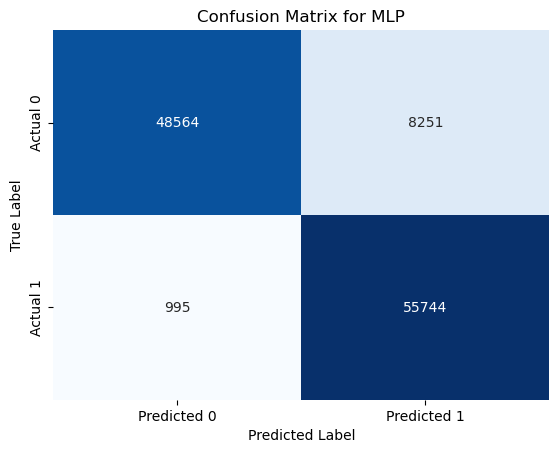

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix_mlp = confusion_matrix(y_test, y_pred_binary)


sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()